In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import time

import pathlib
import json
import numpy as np
import time
import matplotlib.pyplot as plt
from collections import Counter



In [7]:
def histogram(scores, num_bins = 24, vertical_line_idx=13, ):
    fig, ax = plt.subplots()
    n, bins, patches = ax.hist(scores, num_bins, facecolor='#ee613e')
    ax.set_xlabel("Importance score")
    ax.set_ylabel("Frequency")
    ax.axvline(x=scores[min(vertical_line_idx, len(scores) - 1)], color='k', linestyle='--')
    fig.savefig("importance_score_distribution/head_importance_score_distribution.pdf")
    plt.show()
    jklj

In [8]:
def load_data(path):
    data = {}
    for task_dir in path.iterdir():
        data[task_dir.stem] = {}
        for seed_dir in task_dir.iterdir():
            head_masks = []
            head_importances = []
            for i in range(100):
                head_mask_path = seed_dir / f"head_mask_{i}.npy"
                if head_mask_path.exists():
                    head_mask = np.load(head_mask_path)
                    head_importance = np.load(seed_dir / f"head_importance_{i}.npy")
                    head_masks.append(head_mask)
                    head_importances.append(head_importance)
                else:
                    break
            data[task_dir.stem][seed_dir.stem] = {
                "head_masks": head_masks,
                "head_importances": head_importances,
            }
            mlp_masks = []
            mlp_importances = []
            for i in range(100):
                mlp_mask_path = seed_dir / f"mlp_mask_{i}.npy"
                if mlp_mask_path.exists():
                    mlp_mask = np.load(mlp_mask_path)
                    mlp_importance = np.load(seed_dir / f"mlp_importance_{i}.npy")
                    mlp_masks.append(mlp_mask)
                    mlp_importances.append(mlp_importance)
                else:
                    break
            data[task_dir.stem][seed_dir.stem]["mlp_masks"] = mlp_masks
            data[task_dir.stem][seed_dir.stem]["mlp_importances"] = mlp_importances
    return data

def plot_head_distribution(data):
    for task in sorted(data.keys()):
    
        for seed in data[task]:
            print(f"{task} - {seed}")
            head_masks = []
            head_importances = []
            for mask, importance in zip(data[task][seed]["head_masks"], data[task][seed]["head_importances"]):
                if len(head_masks) == 0 or head_masks[-1].sum() != mask.sum():
                    head_masks.append(mask)
                    head_importances.append(importance)

            top_head_ids = Counter()
            for i in range(len(head_masks)):
                mask = head_masks[i]
                importance =  head_importances[i]

                ind = np.argpartition(importance * mask,-10, axis=None)[-10:]
                for ix in ind:
                    top_head_ids[ix] += 1
            print(f"Total pruning iterations: {len(head_masks)}")        
            print(f"Overlap top pruning: {top_head_ids}")        
            print(f"Overlap top heads: {len(top_head_ids)}")        


            if len(head_masks) == 1:
                continue # Nothing got actually pruned
            iterations_to_plot = [0]
            mid = len(head_masks)//2
            end = len(head_masks) - 2

            if len(head_masks) > 2:
                iterations_to_plot.append(mid)
            if len(head_masks) > 3:
                iterations_to_plot.append(end)


            for i in iterations_to_plot:
                mask = head_masks[i]
                importance =  head_importances[i]


                amount_pruned =  head_masks[i].sum() - head_masks[i+1].sum()
                print("Pruning Iteration: ", i)
                one_d_importances = importance.reshape(-1)
                one_d_mask = mask.reshape(-1)
                surviving_importances = one_d_importances[one_d_mask == 1]

                print("Number of surviving heads:", len(surviving_importances))
                print("Amount pruned", amount_pruned)

                if len(surviving_importances) > 1:
                    sorted_imp = surviving_importances[np.argsort(surviving_importances)]
                    histogram(sorted_imp, vertical_line_idx=int(amount_pruned))
            print("--------------------------------")
def plot_mlp_distribution(data):
    for task in sorted(data.keys()):
        for seed in data[task]:
            print(f"{task} - {seed}")
            mlp_masks = []
            mlp_importances = []
            for mask, importance in zip(data[task][seed]["mlp_masks"], data[task][seed]["mlp_importances"]):
                if len(mlp_masks) == 0 or mlp_masks[-1].sum() != mask.sum():
                    mlp_masks.append(mask)
                    mlp_importances.append(importance)
            if len(mlp_masks) == 1:
                continue # Nothing got actually pruned
            iterations_to_plot = [0]
            mid = len(mlp_masks)//2
            end = len(mlp_masks) - 2

            if len(mlp_masks) > 2:
                iterations_to_plot.append(mid)
            if len(mlp_masks) > 3:
                iterations_to_plot.append(end)

            for i in iterations_to_plot:
                mask = mlp_masks[i]
                importance =  mlp_importances[i]
                amount_pruned =  int(mlp_masks[i].sum() - mlp_masks[i+1].sum())
                print("Pruning Iteration: ", i)
                one_d_importances = importance.reshape(-1)
                one_d_mask = mask.reshape(-1)
                print(one_d_importances.shape, one_d_mask.shape)
                surviving_importances = one_d_importances[one_d_mask == 1]
                print("Number of surviving mlps:", len(surviving_importances))
                print("Amount pruned",amount_pruned)

                if len(surviving_importances) > 1:
                    sorted_imp = surviving_importances[np.argsort(surviving_importances)]
                    histogram(sorted_imp, num_bins=7, vertical_line_idx=int(amount_pruned))
            print("--------------------------------")

In [9]:
data_together = load_data(pathlib.Path("../masks/heads_mlps_full_score"))
data_heads = load_data(pathlib.Path("../masks/heads_full_score"))

# Heads - Together Setting

CoLA - seed_71
Total pruning iterations: 6
Overlap top pruning: Counter({36: 6, 113: 6, 104: 6, 60: 6, 23: 5, 129: 5, 30: 5, 77: 4, 74: 3, 58: 3, 11: 2, 86: 2, 22: 1, 127: 1, 92: 1, 140: 1, 120: 1, 134: 1, 8: 1})
Overlap top heads: 19
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


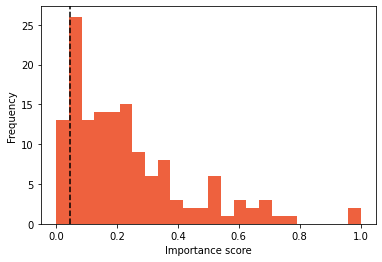

NameError: name 'jklj' is not defined

In [10]:
plot_head_distribution(data_together)

CoLA - seed_71
Total pruning iterations: 4
Overlap top pruning: Counter({113: 4, 22: 4, 104: 4, 60: 4, 30: 4, 74: 3, 36: 3, 129: 2, 58: 2, 86: 2, 120: 2, 140: 2, 23: 1, 77: 1, 53: 1, 95: 1})
Overlap top heads: 16
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


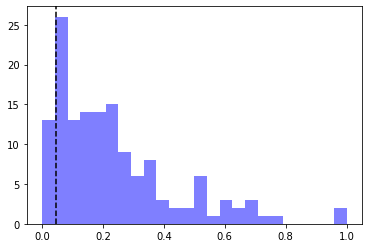

Pruning Iteration:  2
Number of surviving heads: 116
Amount pruned 14.0


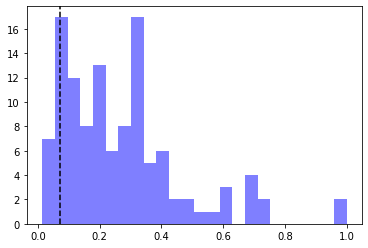

Pruning Iteration:  2
Number of surviving heads: 116
Amount pruned 14.0


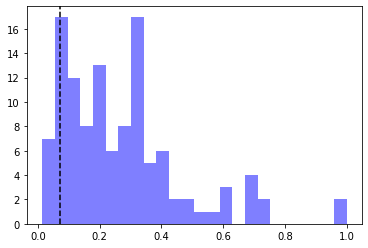

--------------------------------
CoLA - seed_1337
Total pruning iterations: 3
Overlap top pruning: Counter({30: 3, 46: 3, 104: 3, 60: 3, 86: 3, 23: 3, 131: 2, 82: 2, 113: 2, 5: 2, 64: 1, 133: 1, 119: 1, 123: 1})
Overlap top heads: 14
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


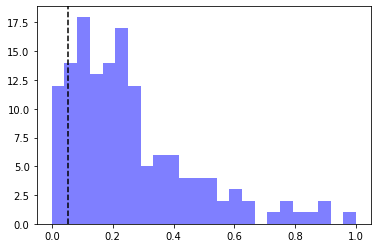

Pruning Iteration:  1
Number of surviving heads: 130
Amount pruned 14.0


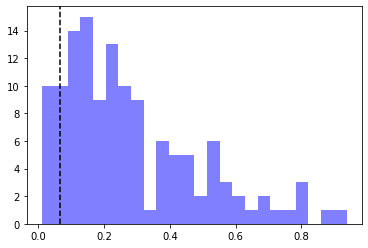

--------------------------------
CoLA - seed_86
Total pruning iterations: 2
Overlap top pruning: Counter({116: 2, 104: 2, 23: 2, 77: 2, 33: 2, 5: 2, 123: 2, 141: 2, 119: 2, 86: 2})
Overlap top heads: 10
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


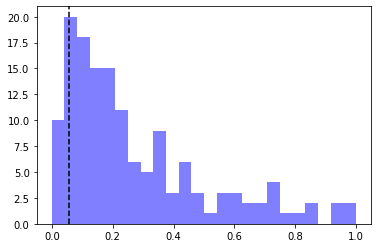

--------------------------------
CoLA - seed_42
Total pruning iterations: 5
Overlap top pruning: Counter({113: 5, 86: 5, 104: 5, 77: 4, 60: 4, 8: 4, 23: 3, 138: 3, 46: 2, 120: 2, 33: 2, 22: 2, 123: 2, 11: 1, 80: 1, 56: 1, 4: 1, 34: 1, 30: 1, 5: 1})
Overlap top heads: 20
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


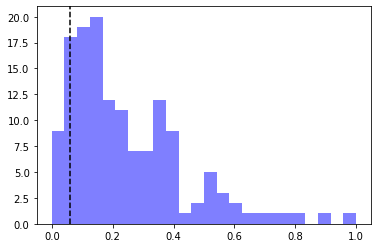

Pruning Iteration:  2
Number of surviving heads: 116
Amount pruned 14.0


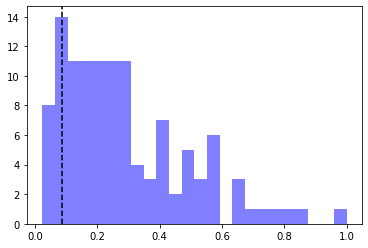

Pruning Iteration:  3
Number of surviving heads: 102
Amount pruned 14.0


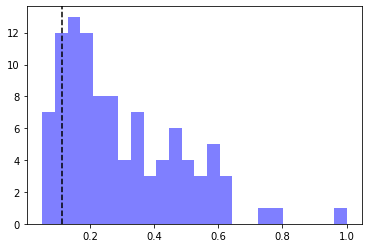

--------------------------------
CoLA - seed_166
Total pruning iterations: 5
Overlap top pruning: Counter({104: 5, 33: 5, 86: 5, 5: 4, 64: 3, 23: 3, 22: 3, 123: 3, 119: 3, 116: 2, 60: 2, 133: 2, 56: 1, 134: 1, 74: 1, 94: 1, 58: 1, 127: 1, 38: 1, 24: 1, 75: 1, 3: 1})
Overlap top heads: 22
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


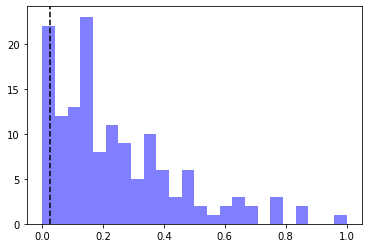

Pruning Iteration:  2
Number of surviving heads: 116
Amount pruned 14.0


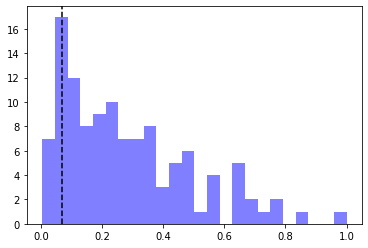

Pruning Iteration:  3
Number of surviving heads: 102
Amount pruned 14.0


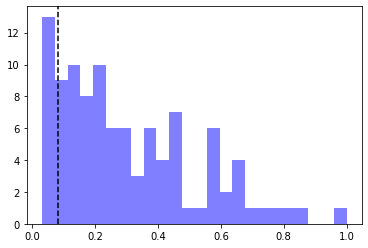

--------------------------------
MNLI - seed_71
Total pruning iterations: 7
Overlap top pruning: Counter({133: 7, 119: 6, 130: 6, 30: 6, 80: 5, 105: 5, 20: 4, 36: 3, 94: 3, 123: 3, 63: 3, 50: 2, 23: 2, 65: 2, 134: 2, 51: 2, 72: 2, 67: 1, 45: 1, 60: 1, 41: 1, 6: 1, 116: 1, 122: 1})
Overlap top heads: 24
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


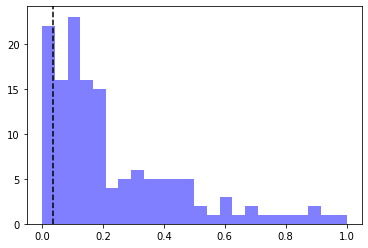

Pruning Iteration:  3
Number of surviving heads: 102
Amount pruned 14.0


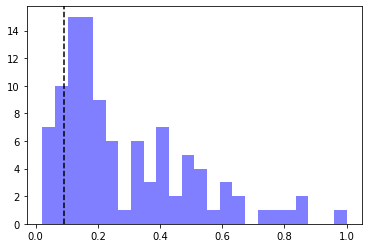

Pruning Iteration:  5
Number of surviving heads: 74
Amount pruned 14.0


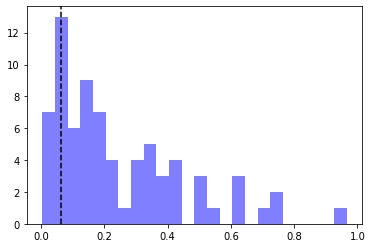

--------------------------------
MNLI - seed_1337
Total pruning iterations: 5
Overlap top pruning: Counter({30: 5, 36: 5, 120: 4, 23: 4, 8: 4, 131: 4, 97: 4, 94: 3, 80: 3, 119: 3, 49: 2, 72: 2, 92: 2, 133: 1, 77: 1, 64: 1, 51: 1, 68: 1})
Overlap top heads: 18
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


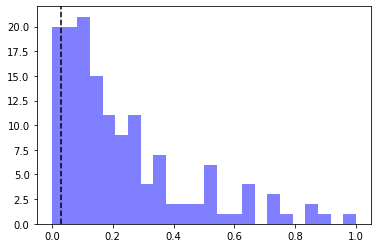

Pruning Iteration:  2
Number of surviving heads: 116
Amount pruned 14.0


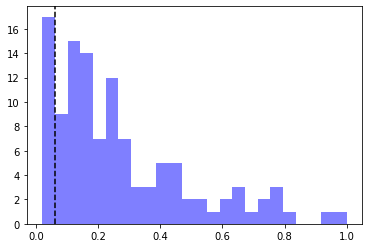

Pruning Iteration:  3
Number of surviving heads: 102
Amount pruned 14.0


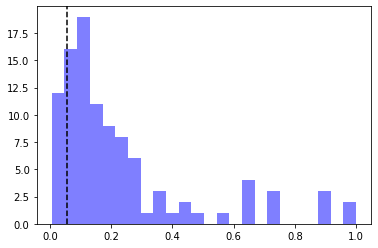

--------------------------------
MNLI - seed_86
Total pruning iterations: 6
Overlap top pruning: Counter({30: 6, 119: 6, 84: 5, 123: 5, 1: 4, 80: 4, 36: 4, 23: 3, 105: 3, 49: 3, 97: 3, 130: 2, 65: 2, 51: 2, 63: 2, 48: 1, 60: 1, 104: 1, 134: 1, 20: 1, 8: 1})
Overlap top heads: 21
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


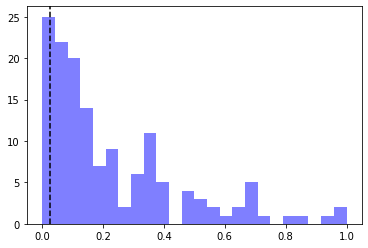

Pruning Iteration:  3
Number of surviving heads: 102
Amount pruned 14.0


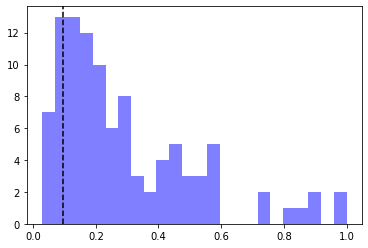

Pruning Iteration:  4
Number of surviving heads: 88
Amount pruned 14.0


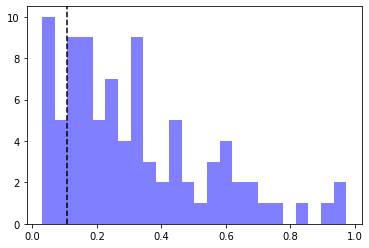

--------------------------------
MNLI - seed_42
Total pruning iterations: 7
Overlap top pruning: Counter({30: 7, 123: 7, 36: 7, 23: 6, 80: 5, 119: 4, 48: 4, 97: 4, 8: 4, 133: 3, 105: 3, 84: 3, 72: 3, 94: 2, 68: 2, 50: 2, 130: 1, 64: 1, 49: 1, 24: 1})
Overlap top heads: 20
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


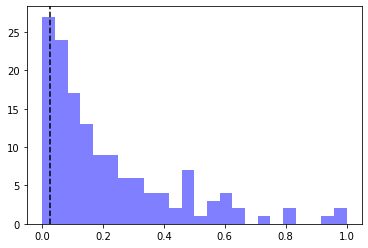

Pruning Iteration:  3
Number of surviving heads: 102
Amount pruned 14.0


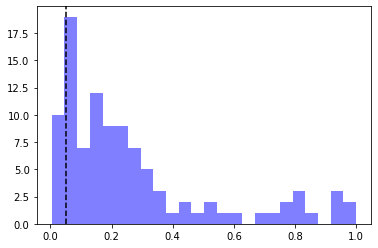

Pruning Iteration:  5
Number of surviving heads: 74
Amount pruned 14.0


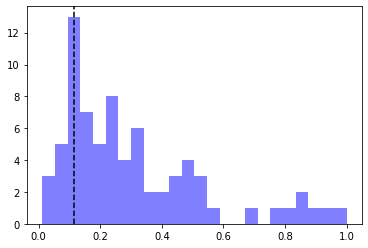

--------------------------------
MNLI - seed_166
Total pruning iterations: 6
Overlap top pruning: Counter({30: 6, 36: 6, 130: 5, 23: 4, 119: 4, 63: 4, 8: 4, 143: 4, 51: 4, 123: 3, 20: 3, 105: 3, 94: 2, 80: 2, 89: 2, 120: 2, 65: 1, 97: 1})
Overlap top heads: 18
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


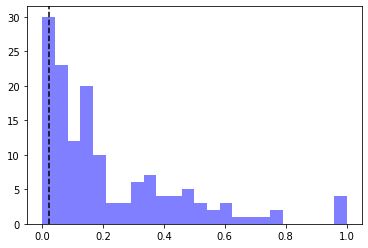

Pruning Iteration:  3
Number of surviving heads: 102
Amount pruned 14.0


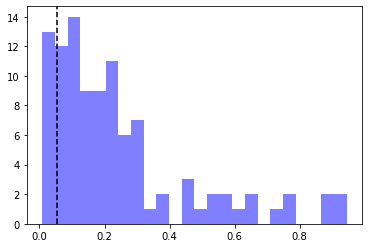

Pruning Iteration:  4
Number of surviving heads: 88
Amount pruned 14.0


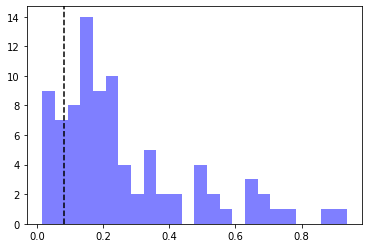

--------------------------------
MRPC - seed_71
Total pruning iterations: 6
Overlap top pruning: Counter({123: 6, 68: 6, 89: 5, 116: 5, 36: 5, 72: 4, 30: 4, 134: 3, 8: 3, 19: 3, 80: 3, 104: 2, 23: 2, 49: 2, 141: 2, 97: 1, 105: 1, 76: 1, 84: 1, 51: 1})
Overlap top heads: 20
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


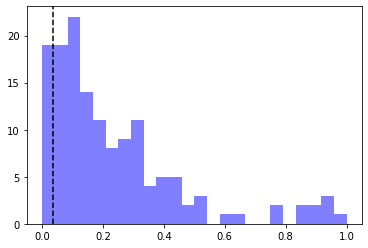

Pruning Iteration:  3
Number of surviving heads: 102
Amount pruned 14.0


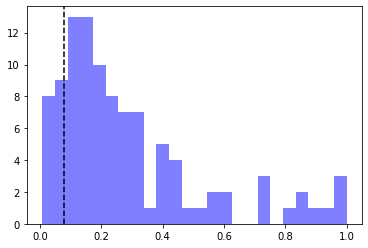

Pruning Iteration:  4
Number of surviving heads: 88
Amount pruned 14.0


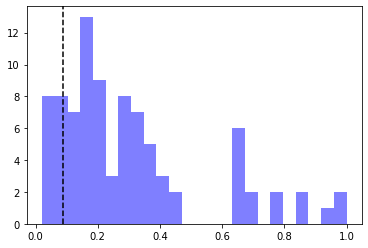

--------------------------------
MRPC - seed_1337
Total pruning iterations: 7
Overlap top pruning: Counter({119: 7, 97: 7, 68: 6, 30: 6, 80: 6, 40: 5, 8: 5, 130: 4, 51: 4, 19: 3, 72: 2, 49: 2, 84: 2, 36: 2, 21: 2, 88: 1, 57: 1, 5: 1, 105: 1, 13: 1, 131: 1, 138: 1})
Overlap top heads: 22
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


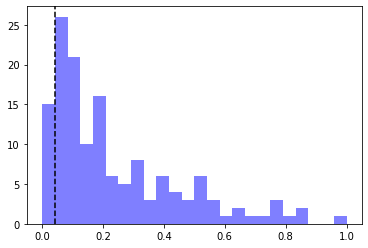

Pruning Iteration:  3
Number of surviving heads: 102
Amount pruned 14.0


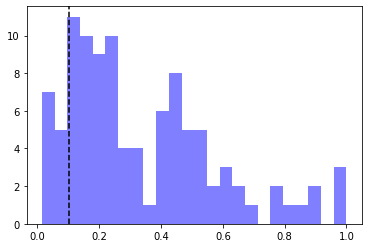

Pruning Iteration:  5
Number of surviving heads: 74
Amount pruned 14.0


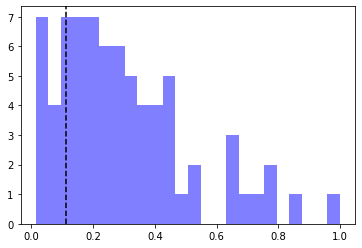

--------------------------------
MRPC - seed_86
Total pruning iterations: 6
Overlap top pruning: Counter({134: 6, 68: 6, 51: 5, 23: 5, 80: 5, 119: 4, 120: 3, 89: 3, 104: 3, 36: 3, 30: 3, 31: 3, 130: 2, 84: 2, 8: 1, 72: 1, 131: 1, 113: 1, 97: 1, 49: 1, 5: 1})
Overlap top heads: 21
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


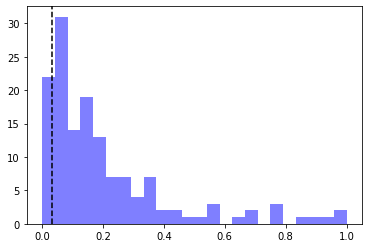

Pruning Iteration:  3
Number of surviving heads: 102
Amount pruned 14.0


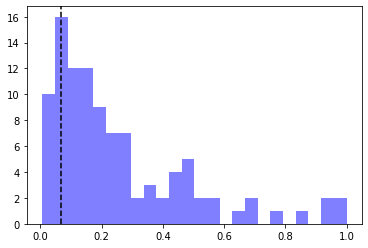

Pruning Iteration:  4
Number of surviving heads: 88
Amount pruned 14.0


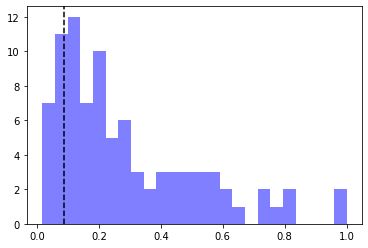

--------------------------------
MRPC - seed_42
Total pruning iterations: 6
Overlap top pruning: Counter({68: 6, 134: 6, 130: 5, 103: 5, 30: 5, 36: 5, 80: 4, 89: 3, 51: 3, 23: 2, 72: 2, 119: 2, 94: 2, 8: 1, 50: 1, 19: 1, 5: 1, 113: 1, 97: 1, 35: 1, 52: 1, 114: 1, 49: 1})
Overlap top heads: 23
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


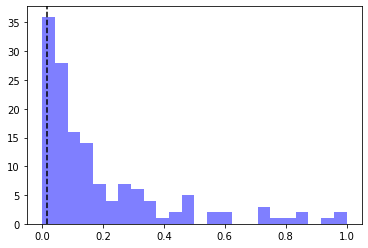

Pruning Iteration:  3
Number of surviving heads: 102
Amount pruned 14.0


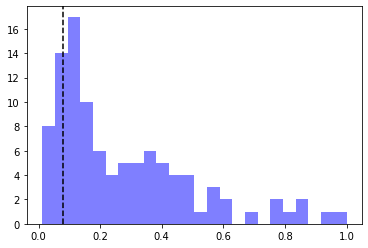

Pruning Iteration:  4
Number of surviving heads: 88
Amount pruned 14.0


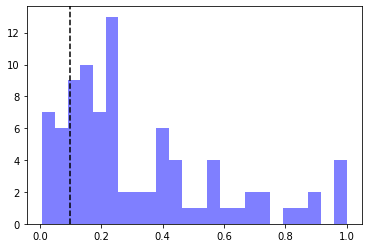

--------------------------------
MRPC - seed_166
Total pruning iterations: 7
Overlap top pruning: Counter({51: 7, 36: 6, 30: 6, 89: 6, 104: 5, 68: 5, 8: 4, 134: 4, 113: 4, 72: 3, 114: 3, 80: 3, 50: 2, 19: 2, 103: 2, 140: 2, 122: 1, 116: 1, 84: 1, 23: 1, 13: 1, 123: 1})
Overlap top heads: 22
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


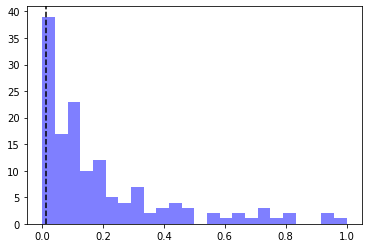

Pruning Iteration:  3
Number of surviving heads: 102
Amount pruned 14.0


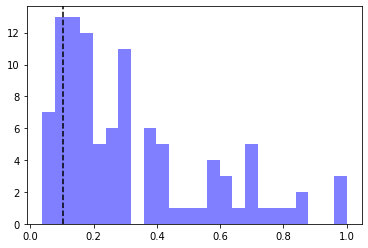

Pruning Iteration:  5
Number of surviving heads: 74
Amount pruned 14.0


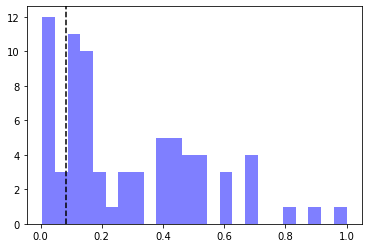

--------------------------------
QNLI - seed_71
Total pruning iterations: 5
Overlap top pruning: Counter({116: 5, 138: 4, 84: 4, 57: 3, 36: 3, 105: 3, 80: 3, 23: 3, 0: 3, 127: 2, 26: 2, 8: 2, 76: 2, 30: 2, 69: 2, 89: 2, 49: 1, 130: 1, 35: 1, 119: 1, 97: 1})
Overlap top heads: 21
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


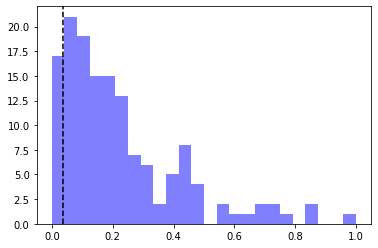

Pruning Iteration:  2
Number of surviving heads: 116
Amount pruned 14.0


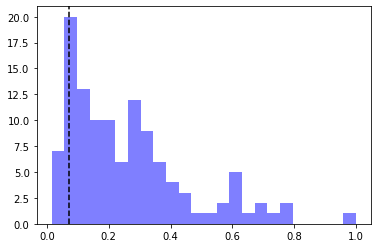

Pruning Iteration:  3
Number of surviving heads: 102
Amount pruned 14.0


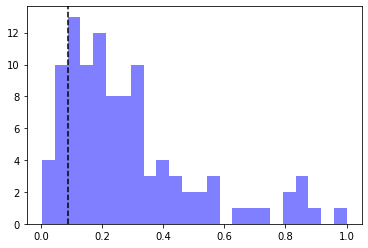

--------------------------------
QNLI - seed_1337
Total pruning iterations: 5
Overlap top pruning: Counter({119: 4, 36: 4, 49: 3, 116: 3, 80: 3, 0: 3, 94: 3, 16: 3, 105: 2, 130: 2, 138: 2, 30: 2, 9: 2, 51: 2, 106: 2, 133: 1, 23: 1, 65: 1, 76: 1, 84: 1, 35: 1, 78: 1, 10: 1, 47: 1, 89: 1})
Overlap top heads: 25
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


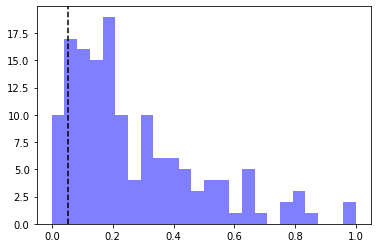

Pruning Iteration:  2
Number of surviving heads: 116
Amount pruned 14.0


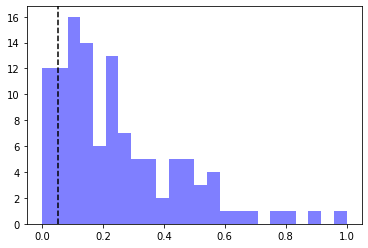

Pruning Iteration:  3
Number of surviving heads: 102
Amount pruned 14.0


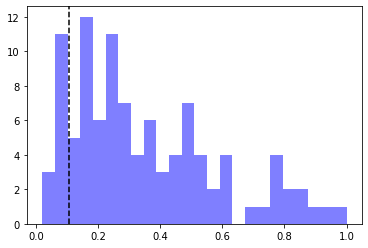

--------------------------------
QNLI - seed_86
Total pruning iterations: 7
Overlap top pruning: Counter({80: 7, 138: 6, 84: 6, 116: 6, 97: 5, 36: 5, 0: 4, 119: 3, 26: 3, 44: 3, 130: 2, 68: 2, 127: 2, 50: 2, 89: 2, 65: 1, 49: 1, 140: 1, 22: 1, 52: 1, 35: 1, 16: 1, 105: 1, 57: 1, 123: 1, 18: 1, 20: 1})
Overlap top heads: 27
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


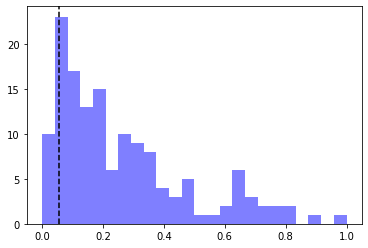

Pruning Iteration:  3
Number of surviving heads: 102
Amount pruned 14.0


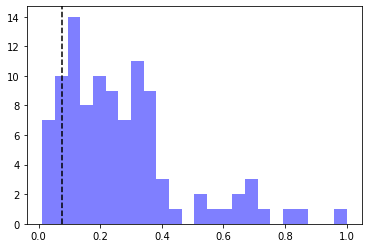

Pruning Iteration:  5
Number of surviving heads: 74
Amount pruned 14.0


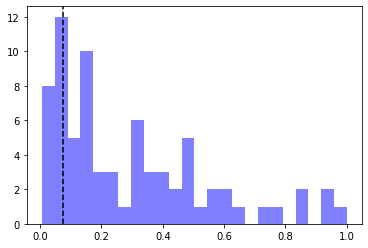

--------------------------------
QNLI - seed_42
Total pruning iterations: 5
Overlap top pruning: Counter({89: 5, 80: 5, 127: 4, 116: 4, 36: 4, 97: 3, 65: 2, 138: 2, 57: 2, 5: 2, 34: 2, 23: 2, 0: 2, 140: 1, 119: 1, 64: 1, 105: 1, 26: 1, 8: 1, 106: 1, 62: 1, 51: 1, 123: 1, 20: 1})
Overlap top heads: 24
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


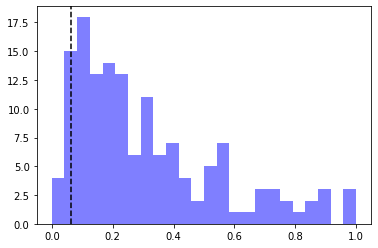

Pruning Iteration:  2
Number of surviving heads: 116
Amount pruned 14.0


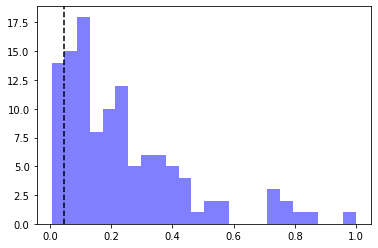

Pruning Iteration:  3
Number of surviving heads: 102
Amount pruned 14.0


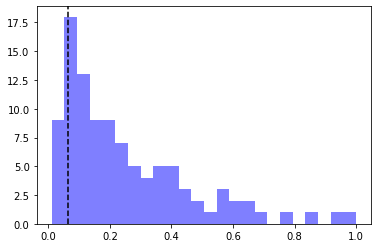

--------------------------------
QNLI - seed_166
Total pruning iterations: 7
Overlap top pruning: Counter({80: 7, 116: 6, 138: 5, 51: 5, 105: 5, 36: 5, 97: 5, 30: 4, 89: 4, 18: 4, 63: 3, 9: 2, 84: 2, 49: 2, 130: 2, 26: 1, 41: 1, 23: 1, 8: 1, 35: 1, 65: 1, 64: 1, 136: 1, 119: 1})
Overlap top heads: 24
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


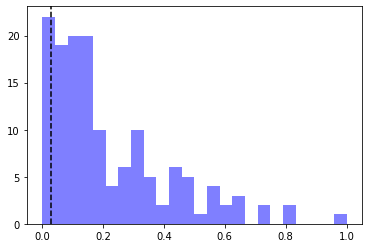

Pruning Iteration:  3
Number of surviving heads: 102
Amount pruned 14.0


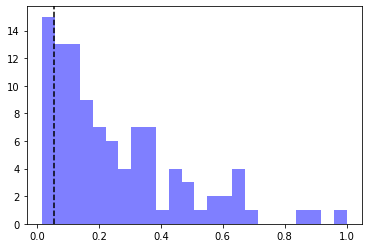

Pruning Iteration:  5
Number of surviving heads: 74
Amount pruned 14.0


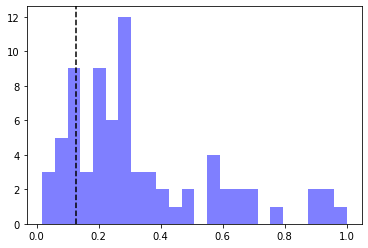

--------------------------------
QQP - seed_71
Total pruning iterations: 8
Overlap top pruning: Counter({116: 8, 80: 7, 131: 6, 23: 6, 68: 5, 84: 5, 0: 5, 134: 5, 130: 3, 97: 3, 51: 3, 30: 3, 24: 2, 36: 2, 33: 2, 35: 2, 70: 2, 103: 1, 133: 1, 20: 1, 77: 1, 19: 1, 49: 1, 136: 1, 3: 1, 105: 1, 123: 1, 9: 1})
Overlap top heads: 28
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


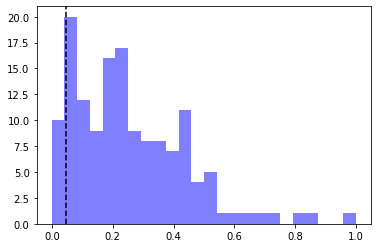

Pruning Iteration:  4
Number of surviving heads: 88
Amount pruned 14.0


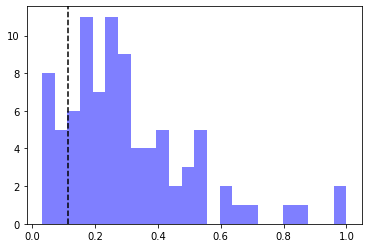

Pruning Iteration:  6
Number of surviving heads: 60
Amount pruned 14.0


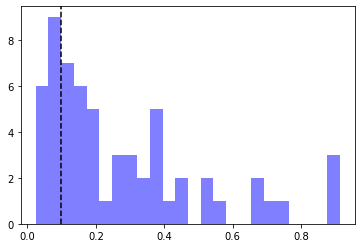

--------------------------------
QQP - seed_1337
Total pruning iterations: 7
Overlap top pruning: Counter({104: 7, 116: 7, 131: 7, 36: 5, 80: 5, 35: 5, 136: 4, 97: 4, 84: 3, 23: 3, 119: 3, 13: 2, 30: 2, 0: 2, 138: 2, 77: 1, 9: 1, 65: 1, 51: 1, 2: 1, 41: 1, 89: 1, 47: 1, 95: 1})
Overlap top heads: 24
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


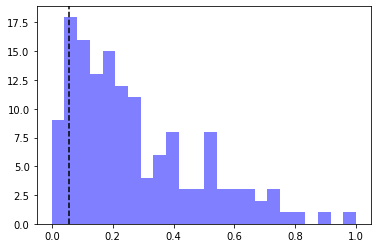

Pruning Iteration:  3
Number of surviving heads: 102
Amount pruned 14.0


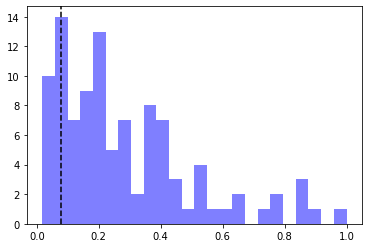

Pruning Iteration:  5
Number of surviving heads: 74
Amount pruned 14.0


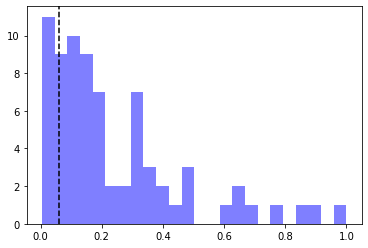

--------------------------------
QQP - seed_86
Total pruning iterations: 7
Overlap top pruning: Counter({23: 6, 104: 6, 36: 6, 30: 5, 65: 4, 94: 4, 79: 4, 120: 3, 113: 3, 8: 3, 85: 3, 80: 3, 116: 3, 68: 3, 51: 2, 50: 2, 124: 2, 10: 2, 72: 1, 46: 1, 9: 1, 20: 1, 97: 1, 119: 1})
Overlap top heads: 24
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


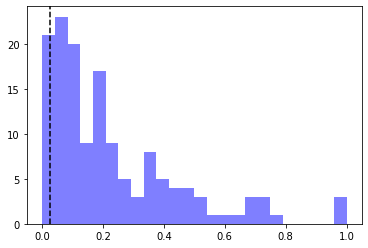

Pruning Iteration:  3
Number of surviving heads: 102
Amount pruned 14.0


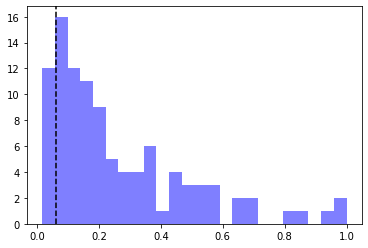

Pruning Iteration:  5
Number of surviving heads: 74
Amount pruned 14.0


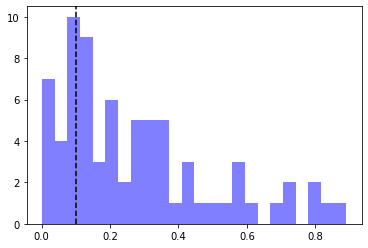

--------------------------------
QQP - seed_42
Total pruning iterations: 8
Overlap top pruning: Counter({131: 8, 116: 7, 80: 7, 97: 6, 84: 5, 119: 5, 134: 5, 36: 4, 13: 4, 130: 3, 0: 2, 33: 2, 104: 2, 1: 2, 30: 2, 70: 2, 123: 2, 51: 1, 107: 1, 19: 1, 47: 1, 57: 1, 35: 1, 20: 1, 23: 1, 52: 1, 137: 1, 68: 1, 96: 1})
Overlap top heads: 29
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


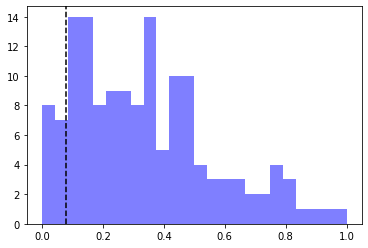

Pruning Iteration:  4
Number of surviving heads: 88
Amount pruned 14.0


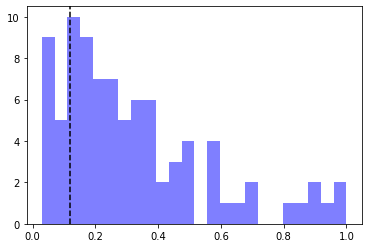

Pruning Iteration:  6
Number of surviving heads: 60
Amount pruned 14.0


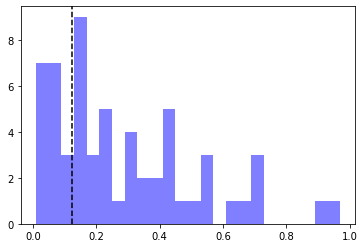

--------------------------------
QQP - seed_166
Total pruning iterations: 7
Overlap top pruning: Counter({30: 6, 80: 6, 97: 6, 36: 6, 133: 5, 65: 4, 130: 3, 49: 3, 95: 3, 89: 3, 23: 3, 116: 2, 16: 2, 1: 2, 134: 2, 62: 2, 5: 1, 38: 1, 76: 1, 68: 1, 55: 1, 103: 1, 31: 1, 94: 1, 92: 1, 52: 1, 84: 1, 0: 1})
Overlap top heads: 28
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


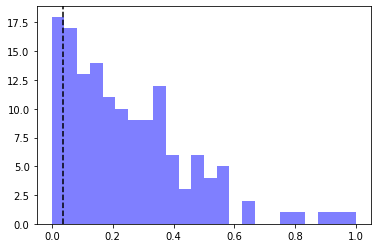

Pruning Iteration:  3
Number of surviving heads: 102
Amount pruned 14.0


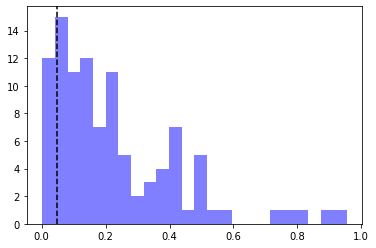

Pruning Iteration:  5
Number of surviving heads: 74
Amount pruned 14.0


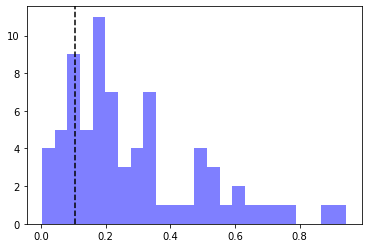

--------------------------------
RTE - seed_71
Total pruning iterations: 9
Overlap top pruning: Counter({68: 9, 116: 9, 40: 6, 72: 6, 23: 6, 99: 6, 49: 5, 5: 5, 130: 5, 36: 4, 92: 3, 120: 3, 8: 3, 134: 2, 33: 2, 94: 2, 140: 2, 35: 2, 24: 2, 0: 1, 41: 1, 30: 1, 51: 1, 93: 1, 127: 1, 113: 1, 97: 1})
Overlap top heads: 27
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


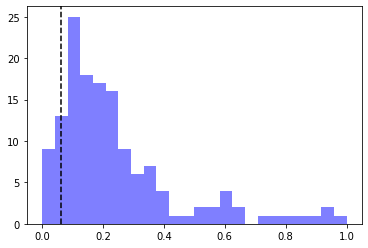

Pruning Iteration:  4
Number of surviving heads: 88
Amount pruned 14.0


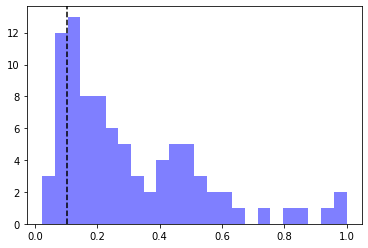

Pruning Iteration:  7
Number of surviving heads: 46
Amount pruned 14.0


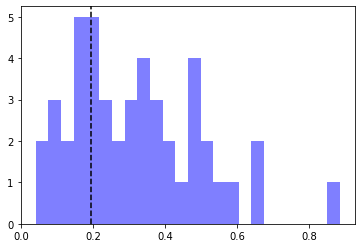

--------------------------------
RTE - seed_1337
Total pruning iterations: 9
Overlap top pruning: Counter({5: 8, 68: 8, 141: 7, 113: 7, 123: 6, 52: 5, 84: 5, 30: 5, 103: 4, 72: 3, 40: 3, 80: 3, 134: 2, 89: 2, 23: 2, 19: 2, 43: 2, 120: 2, 49: 2, 41: 1, 110: 1, 11: 1, 97: 1, 132: 1, 62: 1, 77: 1, 51: 1, 36: 1, 73: 1, 13: 1, 104: 1})
Overlap top heads: 31
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


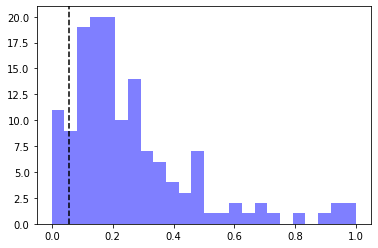

Pruning Iteration:  4
Number of surviving heads: 88
Amount pruned 14.0


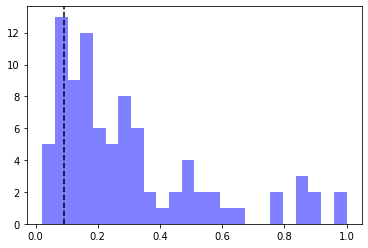

Pruning Iteration:  7
Number of surviving heads: 46
Amount pruned 14.0


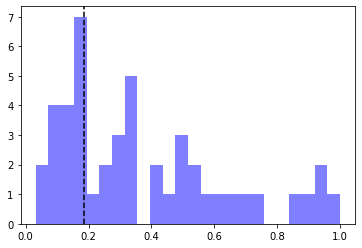

--------------------------------
RTE - seed_86
Total pruning iterations: 8
Overlap top pruning: Counter({123: 7, 5: 7, 68: 5, 97: 5, 116: 5, 93: 4, 138: 4, 99: 4, 40: 3, 119: 3, 89: 3, 16: 3, 30: 2, 84: 2, 120: 2, 141: 2, 26: 2, 35: 2, 76: 1, 127: 1, 110: 1, 34: 1, 60: 1, 0: 1, 27: 1, 50: 1, 133: 1, 57: 1, 49: 1, 77: 1, 134: 1, 36: 1, 80: 1})
Overlap top heads: 33
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


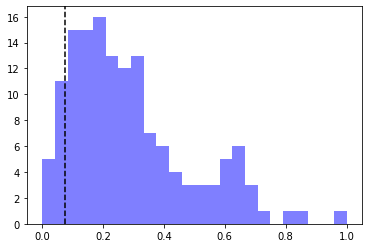

Pruning Iteration:  4
Number of surviving heads: 88
Amount pruned 14.0


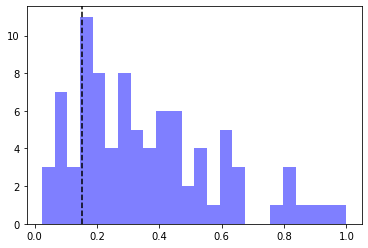

Pruning Iteration:  6
Number of surviving heads: 60
Amount pruned 14.0


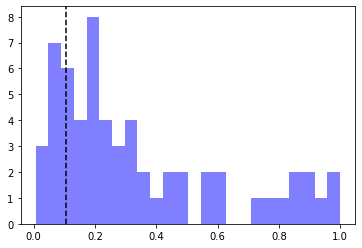

--------------------------------
RTE - seed_42
Total pruning iterations: 6
Overlap top pruning: Counter({120: 6, 97: 6, 68: 6, 84: 4, 134: 4, 76: 3, 23: 3, 4: 3, 51: 3, 36: 3, 116: 2, 30: 2, 119: 2, 87: 2, 80: 2, 49: 2, 89: 1, 34: 1, 20: 1, 140: 1, 35: 1, 5: 1, 123: 1})
Overlap top heads: 23
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


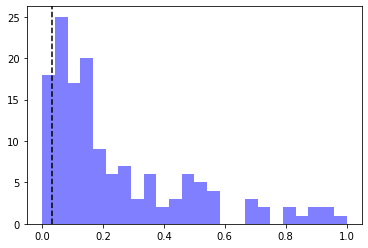

Pruning Iteration:  3
Number of surviving heads: 102
Amount pruned 14.0


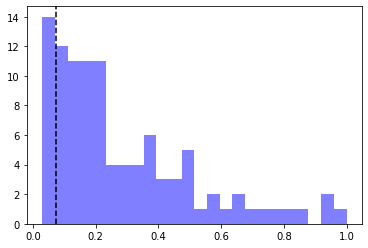

Pruning Iteration:  4
Number of surviving heads: 88
Amount pruned 14.0


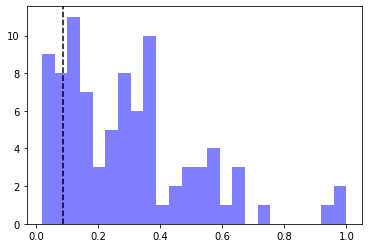

--------------------------------
RTE - seed_166
Total pruning iterations: 6
Overlap top pruning: Counter({131: 5, 116: 5, 138: 5, 80: 4, 99: 4, 36: 3, 68: 3, 72: 3, 0: 3, 94: 3, 23: 2, 62: 2, 51: 2, 93: 2, 30: 2, 21: 2, 119: 2, 49: 2, 123: 1, 52: 1, 8: 1, 40: 1, 24: 1, 97: 1})
Overlap top heads: 24
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


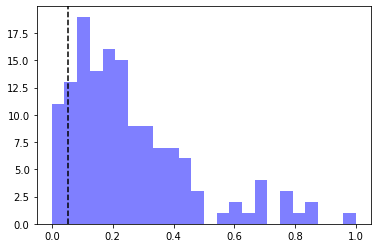

Pruning Iteration:  3
Number of surviving heads: 102
Amount pruned 14.0


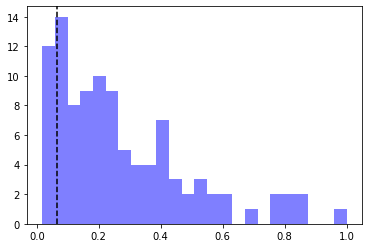

Pruning Iteration:  4
Number of surviving heads: 88
Amount pruned 14.0


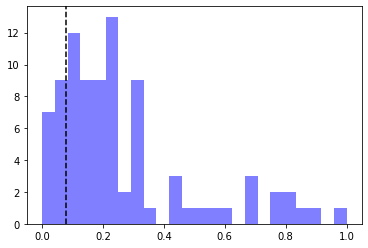

--------------------------------
SST-2 - seed_71
Total pruning iterations: 9
Overlap top pruning: Counter({131: 8, 77: 7, 134: 6, 105: 6, 110: 5, 67: 5, 118: 5, 80: 4, 45: 4, 138: 4, 85: 3, 5: 3, 60: 3, 87: 3, 24: 3, 84: 2, 113: 2, 54: 2, 23: 2, 22: 2, 120: 2, 42: 2, 58: 1, 29: 1, 55: 1, 35: 1, 8: 1, 104: 1, 73: 1})
Overlap top heads: 29
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


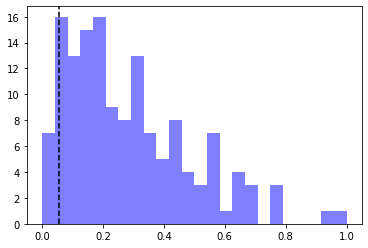

Pruning Iteration:  4
Number of surviving heads: 88
Amount pruned 14.0


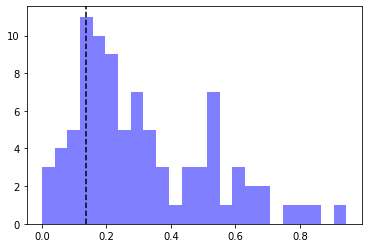

Pruning Iteration:  7
Number of surviving heads: 46
Amount pruned 14.0


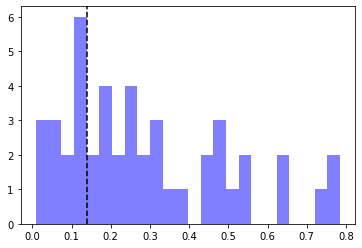

--------------------------------
SST-2 - seed_1337
Total pruning iterations: 9
Overlap top pruning: Counter({124: 8, 131: 7, 104: 7, 77: 7, 113: 5, 105: 5, 110: 5, 46: 4, 89: 4, 33: 4, 63: 4, 23: 3, 5: 3, 84: 3, 138: 2, 16: 2, 92: 2, 68: 2, 30: 2, 70: 2, 59: 1, 57: 1, 142: 1, 29: 1, 93: 1, 97: 1, 85: 1, 67: 1, 65: 1})
Overlap top heads: 29
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


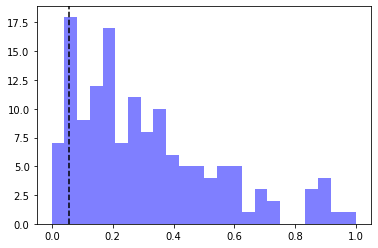

Pruning Iteration:  4
Number of surviving heads: 88
Amount pruned 14.0


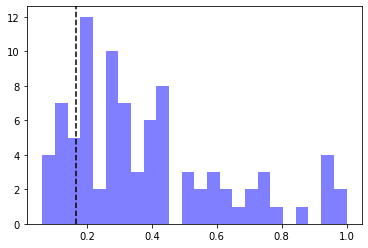

Pruning Iteration:  7
Number of surviving heads: 46
Amount pruned 14.0


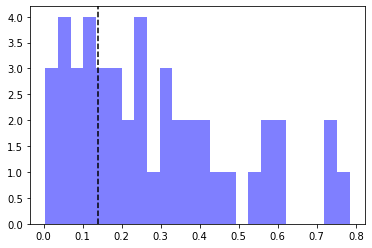

--------------------------------
SST-2 - seed_86
Total pruning iterations: 9
Overlap top pruning: Counter({131: 8, 110: 7, 105: 7, 104: 5, 54: 4, 41: 4, 30: 4, 92: 4, 4: 3, 85: 3, 67: 3, 77: 3, 134: 3, 50: 3, 138: 3, 13: 3, 18: 2, 46: 2, 8: 2, 23: 2, 71: 2, 16: 2, 24: 2, 87: 2, 33: 1, 142: 1, 72: 1, 5: 1, 113: 1, 115: 1, 60: 1})
Overlap top heads: 31
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


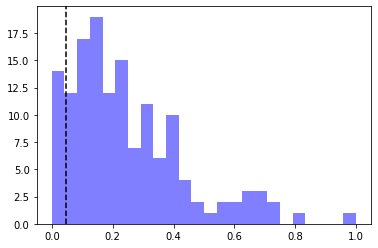

Pruning Iteration:  4
Number of surviving heads: 88
Amount pruned 14.0


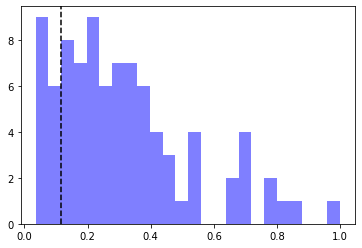

Pruning Iteration:  7
Number of surviving heads: 46
Amount pruned 14.0


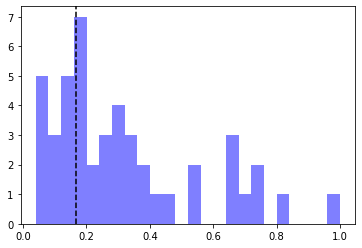

--------------------------------
SST-2 - seed_42
Total pruning iterations: 8
Overlap top pruning: Counter({124: 8, 92: 8, 105: 7, 113: 5, 104: 5, 138: 5, 70: 4, 131: 4, 53: 3, 110: 3, 37: 2, 30: 2, 72: 2, 76: 2, 29: 2, 8: 2, 63: 2, 67: 2, 142: 2, 36: 2, 22: 1, 5: 1, 41: 1, 89: 1, 33: 1, 18: 1, 13: 1, 107: 1})
Overlap top heads: 28
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


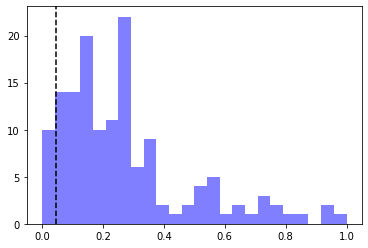

Pruning Iteration:  4
Number of surviving heads: 88
Amount pruned 14.0


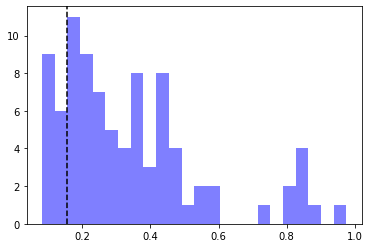

Pruning Iteration:  6
Number of surviving heads: 60
Amount pruned 14.0


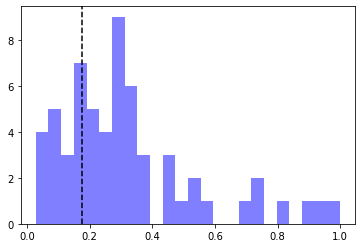

--------------------------------
SST-2 - seed_166
Total pruning iterations: 6
Overlap top pruning: Counter({105: 6, 30: 6, 124: 4, 113: 4, 53: 3, 8: 3, 136: 3, 104: 3, 131: 3, 5: 3, 85: 2, 67: 2, 92: 2, 68: 2, 138: 2, 70: 1, 41: 1, 10: 1, 60: 1, 77: 1, 22: 1, 83: 1, 54: 1, 45: 1, 16: 1, 116: 1, 50: 1})
Overlap top heads: 27
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


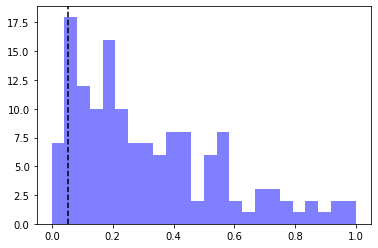

Pruning Iteration:  3
Number of surviving heads: 102
Amount pruned 14.0


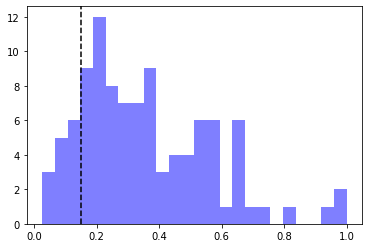

Pruning Iteration:  4
Number of surviving heads: 88
Amount pruned 14.0


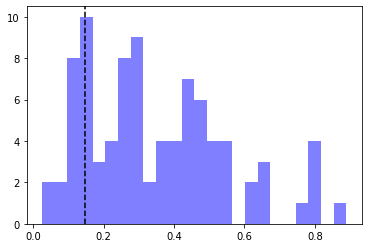

--------------------------------
STS-B - seed_71
Total pruning iterations: 9
Overlap top pruning: Counter({68: 9, 36: 7, 141: 7, 99: 7, 118: 5, 92: 5, 20: 4, 5: 4, 26: 4, 23: 4, 76: 4, 80: 3, 84: 3, 30: 2, 123: 2, 134: 2, 119: 2, 49: 2, 0: 2, 50: 2, 120: 2, 19: 1, 72: 1, 59: 1, 128: 1, 85: 1, 114: 1, 104: 1, 103: 1})
Overlap top heads: 29
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


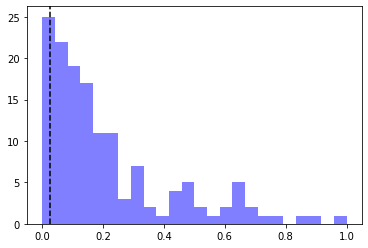

Pruning Iteration:  4
Number of surviving heads: 88
Amount pruned 14.0


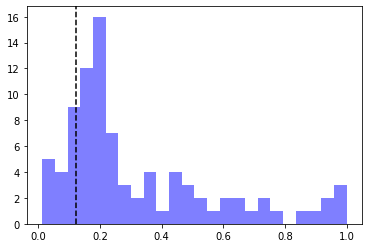

Pruning Iteration:  7
Number of surviving heads: 46
Amount pruned 14.0


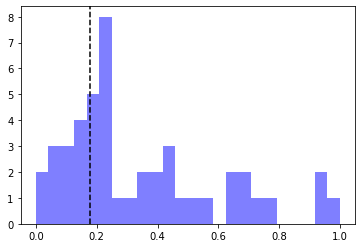

--------------------------------
STS-B - seed_1337
Total pruning iterations: 9
Overlap top pruning: Counter({68: 9, 36: 6, 119: 6, 80: 5, 30: 4, 26: 4, 23: 4, 5: 4, 72: 4, 104: 4, 50: 4, 49: 3, 140: 3, 123: 3, 98: 2, 19: 2, 8: 2, 92: 2, 99: 2, 134: 2, 127: 2, 113: 2, 120: 1, 4: 1, 51: 1, 18: 1, 97: 1, 103: 1, 94: 1, 132: 1, 91: 1, 124: 1, 129: 1})
Overlap top heads: 33
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


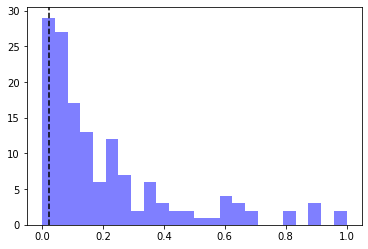

Pruning Iteration:  4
Number of surviving heads: 88
Amount pruned 14.0


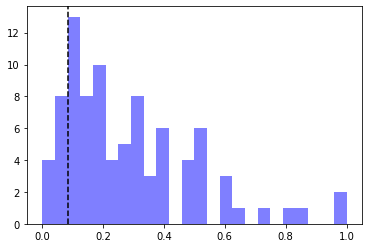

Pruning Iteration:  7
Number of surviving heads: 46
Amount pruned 14.0


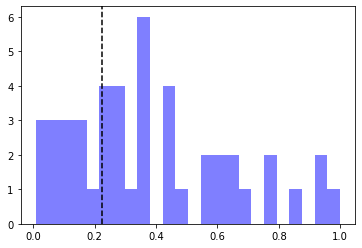

--------------------------------
STS-B - seed_86
Total pruning iterations: 9
Overlap top pruning: Counter({134: 9, 68: 9, 113: 8, 36: 7, 99: 7, 80: 6, 131: 6, 50: 5, 26: 4, 97: 4, 72: 3, 30: 2, 116: 2, 94: 2, 85: 2, 5: 2, 23: 2, 19: 1, 120: 1, 20: 1, 51: 1, 128: 1, 8: 1, 103: 1, 141: 1, 49: 1, 76: 1})
Overlap top heads: 27
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


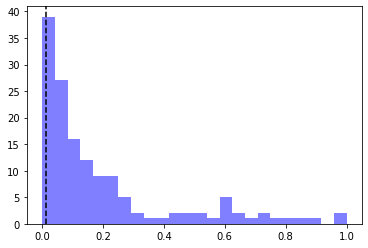

Pruning Iteration:  4
Number of surviving heads: 88
Amount pruned 14.0


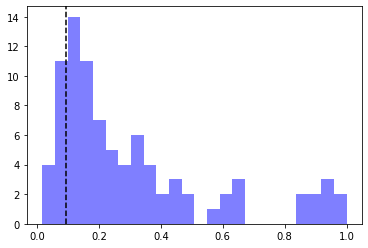

Pruning Iteration:  7
Number of surviving heads: 46
Amount pruned 14.0


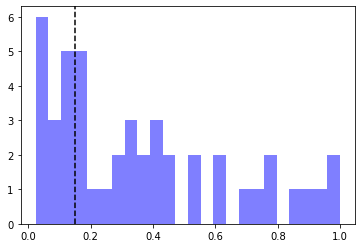

--------------------------------
STS-B - seed_42
Total pruning iterations: 9
Overlap top pruning: Counter({134: 9, 76: 9, 68: 9, 116: 9, 36: 5, 105: 5, 5: 5, 94: 5, 30: 4, 23: 4, 49: 4, 92: 3, 103: 3, 19: 2, 120: 2, 51: 2, 72: 2, 123: 2, 50: 2, 27: 1, 141: 1, 4: 1, 104: 1})
Overlap top heads: 23
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


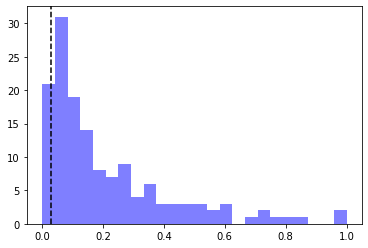

Pruning Iteration:  4
Number of surviving heads: 88
Amount pruned 14.0


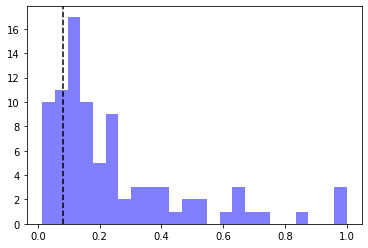

Pruning Iteration:  7
Number of surviving heads: 46
Amount pruned 14.0


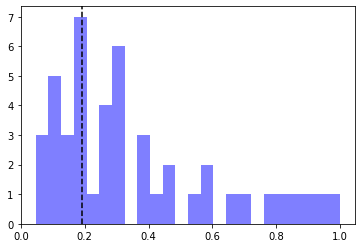

--------------------------------
STS-B - seed_166
Total pruning iterations: 10
Overlap top pruning: Counter({116: 10, 68: 9, 76: 8, 36: 8, 30: 8, 94: 7, 49: 5, 99: 4, 123: 4, 5: 4, 19: 3, 134: 3, 57: 3, 8: 2, 50: 2, 113: 2, 130: 2, 141: 1, 0: 1, 133: 1, 89: 1, 23: 1, 72: 1, 20: 1, 78: 1, 70: 1, 60: 1, 92: 1, 51: 1, 97: 1, 119: 1, 10: 1, 127: 1})
Overlap top heads: 33
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


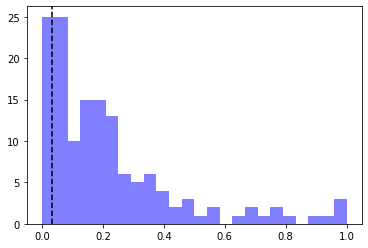

Pruning Iteration:  5
Number of surviving heads: 74
Amount pruned 14.0


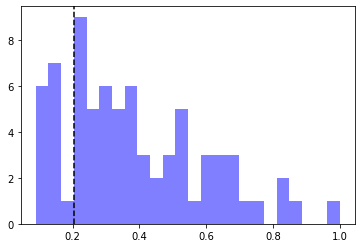

Pruning Iteration:  8
Number of surviving heads: 32
Amount pruned 14.0


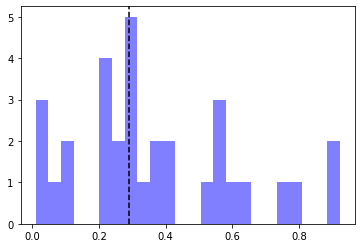

--------------------------------
WNLI - seed_71
Total pruning iterations: 5
Overlap top pruning: Counter({103: 5, 120: 5, 49: 5, 36: 5, 113: 5, 132: 4, 84: 3, 72: 3, 30: 2, 79: 2, 18: 2, 4: 1, 62: 1, 73: 1, 29: 1, 85: 1, 13: 1, 134: 1, 71: 1, 35: 1})
Overlap top heads: 20
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


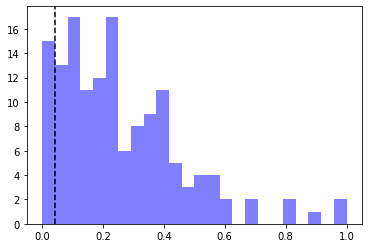

Pruning Iteration:  2
Number of surviving heads: 116
Amount pruned 14.0


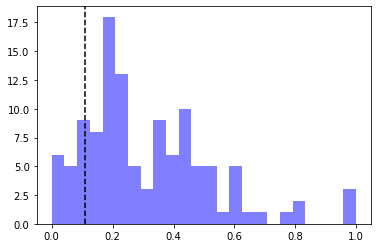

Pruning Iteration:  3
Number of surviving heads: 102
Amount pruned 14.0


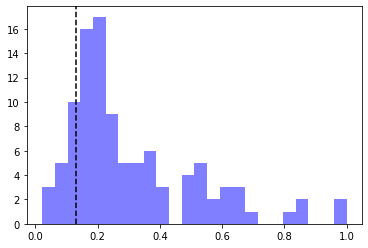

--------------------------------
WNLI - seed_1337
Total pruning iterations: 12
Overlap top pruning: Counter({5: 11, 130: 11, 104: 8, 34: 6, 89: 6, 143: 6, 68: 5, 43: 5, 84: 5, 138: 5, 72: 4, 113: 4, 51: 4, 35: 4, 67: 3, 49: 3, 52: 3, 18: 2, 114: 2, 8: 2, 33: 2, 50: 2, 46: 2, 47: 2, 97: 1, 119: 1, 116: 1, 28: 1, 64: 1, 79: 1, 16: 1, 30: 1, 98: 1, 124: 1, 136: 1, 37: 1, 48: 1})
Overlap top heads: 37
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


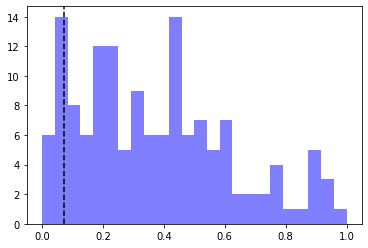

Pruning Iteration:  6
Number of surviving heads: 60
Amount pruned 14.0


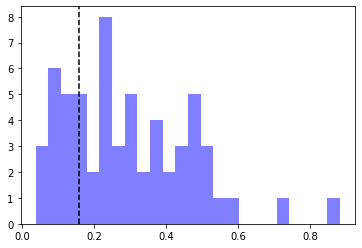

Pruning Iteration:  10
Number of surviving heads: 4
Amount pruned 4.0


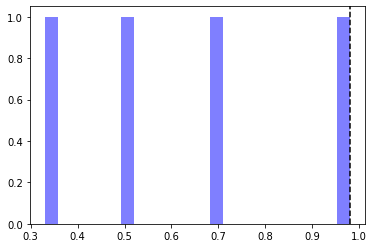

--------------------------------
WNLI - seed_86
Total pruning iterations: 12
Overlap top pruning: Counter({134: 9, 99: 8, 138: 7, 120: 7, 65: 6, 113: 6, 72: 6, 51: 6, 23: 6, 68: 5, 5: 5, 84: 4, 43: 4, 80: 4, 49: 3, 97: 3, 127: 3, 85: 2, 52: 2, 87: 2, 18: 2, 132: 2, 46: 2, 50: 2, 48: 2, 47: 2, 35: 1, 36: 1, 25: 1, 41: 1, 93: 1, 24: 1, 79: 1, 45: 1, 37: 1, 143: 1})
Overlap top heads: 36
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


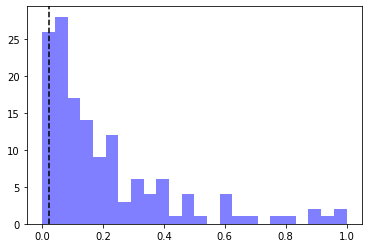

Pruning Iteration:  6
Number of surviving heads: 60
Amount pruned 14.0


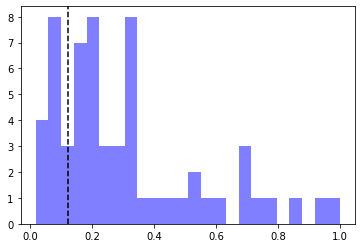

Pruning Iteration:  10
Number of surviving heads: 4
Amount pruned 4.0


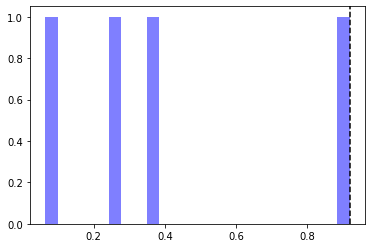

--------------------------------
WNLI - seed_42
Total pruning iterations: 12
Overlap top pruning: Counter({5: 8, 68: 7, 49: 7, 97: 6, 119: 6, 133: 6, 130: 5, 72: 5, 84: 5, 103: 4, 120: 4, 141: 4, 104: 4, 31: 3, 10: 3, 116: 3, 80: 3, 60: 3, 89: 3, 87: 3, 43: 2, 23: 2, 37: 2, 14: 2, 50: 2, 51: 2, 46: 2, 48: 2, 47: 2, 36: 1, 13: 1, 79: 1, 19: 1, 131: 1, 34: 1, 118: 1, 113: 1, 52: 1, 143: 1})
Overlap top heads: 39
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


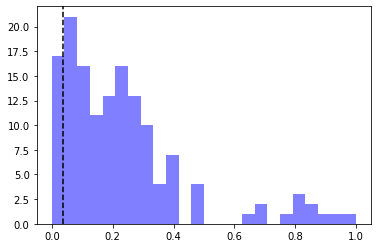

Pruning Iteration:  6
Number of surviving heads: 60
Amount pruned 14.0


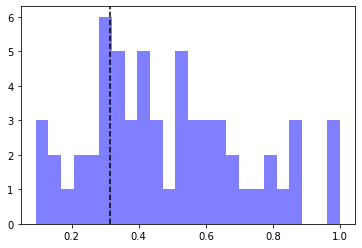

Pruning Iteration:  10
Number of surviving heads: 4
Amount pruned 4.0


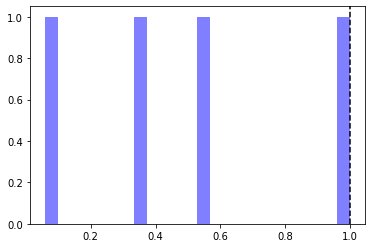

--------------------------------
WNLI - seed_166
Total pruning iterations: 12
Overlap top pruning: Counter({119: 10, 97: 10, 5: 9, 134: 8, 131: 7, 49: 5, 79: 5, 51: 5, 62: 5, 68: 5, 124: 4, 30: 4, 50: 4, 72: 3, 84: 3, 23: 3, 43: 3, 80: 3, 20: 2, 40: 2, 47: 2, 48: 2, 46: 2, 22: 1, 31: 1, 9: 1, 34: 1, 13: 1, 110: 1, 89: 1, 104: 1, 130: 1, 138: 1, 38: 1, 37: 1, 52: 1, 143: 1})
Overlap top heads: 37
Pruning Iteration:  0
Number of surviving heads: 144
Amount pruned 14.0


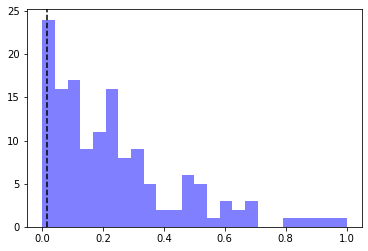

Pruning Iteration:  6
Number of surviving heads: 60
Amount pruned 14.0


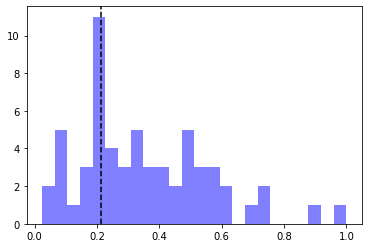

Pruning Iteration:  10
Number of surviving heads: 4
Amount pruned 4.0


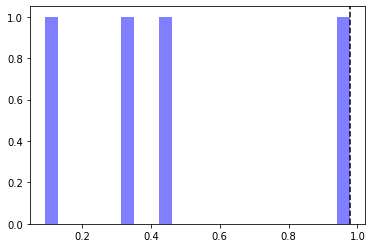

--------------------------------


In [20]:
plot_head_distribution(data_heads)

# Correlation of head scores across seeds

In [52]:
from itertools import combinations 
from scipy.stats import spearmanr, pearsonr


def print_correlation_across_seeds_for_initial_importance_scores(data):

    for task in sorted(data.keys()):

    #     for seed in data[task]:
    #         itearation_1_importances = data[task][seed]["head_importances"][0].reshape(-1)
    #         itearation_2_importances = data[task][seed]["head_importances"][-1].reshape(-1)

    #         itearation_2_mask = data[task][seed]["head_masks"][-1].reshape(-1)



    #         importance_1 = itearation_1_importances[itearation_2_mask == 1]
    #         importance_2 = itearation_2_importances[itearation_2_mask == 1]
    #         p_r, p_p = pearsonr(importance_1, importance_2)
    #         s_r, s_p = spearmanr(importance_1, importance_2)
    #         print(f"Task - {task}")
    #         print(f"Seed - {seed} - Iteration 0, {len(itearation_2_importances) -1}")
    #         print(f"Pearson-r: {p_r}, pvalue: {p_p:.2f}")
    #         print(f"Spearman-r: {s_r}, pvalue: {s_p:.2f}")


        for seed_1, seed_2 in combinations(data[task].keys(), 2):

            importance_1 = data[task][seed_1]["head_importances"][0].reshape(-1) 
            importance_2 = data[task][seed_2]["head_importances"][0].reshape(-1)
            p_r, p_p = pearsonr(importance_1, importance_2)
            s_r, s_p = spearmanr(importance_1, importance_2)
            print(f"Task - {task}")
            print(f"Seed - {seed_1}, {seed_2}")
            print(f"Pearson-r: {p_r}, pvalue: {p_p:.2f}")
            print(f"Spearman-r: {s_r}, pvalue: {s_p:.2f}")


def print_correlation_across_seeds_for_first_and_last_importance_scores(data):

    for task in sorted(data.keys()):

        for seed in data[task]:
            itearation_1_importances = data[task][seed]["head_importances"][0].reshape(-1)
            itearation_2_importances = data[task][seed]["head_importances"][-1].reshape(-1)

            itearation_2_mask = data[task][seed]["head_masks"][-1].reshape(-1)

            importance_1 = itearation_1_importances[itearation_2_mask == 1]
            importance_2 = itearation_2_importances[itearation_2_mask == 1]
            p_r, p_p = pearsonr(importance_1, importance_2)
            s_r, s_p = spearmanr(importance_1, importance_2)
            print(f"Task - {task}")
            print(f"Seed - {seed} - Iteration 0, {len(data[task][seed]['head_importances']) -1}")
            print(f"Pearson-r: {p_r}, pvalue: {p_p:.2f}")
            print(f"Spearman-r: {s_r}, pvalue: {s_p:.2f}")

            
            
def print_correlation_across_seeds_for_pairs_of_importance_scores(data):

    for task in sorted(data.keys()):

        for seed in data[task]:
            head_importances = data[task][seed]["head_importances"]
            head_masks = data[task][seed]["head_masks"]
            
            for i in range(len(head_importances) - 2):
                
            
                itearation_1_importances = head_importances[i].reshape(-1)
                itearation_2_importances = head_importances[i+1].reshape(-1)

                itearation_2_mask = head_masks[i+1].reshape(-1)

                importance_1 = itearation_1_importances
                importance_2 = itearation_2_importances
                p_r, p_p = pearsonr(importance_1, importance_2)
                s_r, s_p = spearmanr(importance_1, importance_2)
                print(f"Task - {task}")
                print(f"Seed - {seed} - Iteration {i}, {i+1}")
                print(f"Pearson-r: {p_r}, pvalue: {p_p:.2f}")
                print(f"Spearman-r: {s_r}, pvalue: {s_p:.2f}")

          

In [53]:
print_correlation_across_seeds_for_pairs_of_importance_scores(data_together)

Task - CoLA
Seed - seed_71 - Iteration 0, 1
Pearson-r: 0.8337372576122517, pvalue: 0.00
Spearman-r: 0.7195161160678403, pvalue: 0.00
Task - CoLA
Seed - seed_71 - Iteration 1, 2
Pearson-r: 0.2364707969418242, pvalue: 0.00
Spearman-r: 0.13779037054899124, pvalue: 0.10
Task - CoLA
Seed - seed_71 - Iteration 2, 3
Pearson-r: 0.22104417659688844, pvalue: 0.01
Spearman-r: 0.12376416686761514, pvalue: 0.14
Task - CoLA
Seed - seed_71 - Iteration 3, 4
Pearson-r: 0.9432280563254355, pvalue: 0.00
Spearman-r: 0.911526404629853, pvalue: 0.00
Task - CoLA
Seed - seed_71 - Iteration 4, 5
Pearson-r: 0.9509347514252515, pvalue: 0.00
Spearman-r: 0.9128285507595852, pvalue: 0.00
Task - CoLA
Seed - seed_1337 - Iteration 0, 1
Pearson-r: 0.7614196242567619, pvalue: 0.00
Spearman-r: 0.7212844626637731, pvalue: 0.00
Task - CoLA
Seed - seed_1337 - Iteration 1, 2
Pearson-r: 0.17831576633010376, pvalue: 0.03
Spearman-r: 0.09409211478176997, pvalue: 0.26
Task - CoLA
Seed - seed_1337 - Iteration 2, 3
Pearson-r: 0.13

In [43]:
print_correlation_across_seeds_for_first_and_last_importance_scores(data_heads)

Task - CoLA
Seed - seed_71 - Iteration 0, 3
Pearson-r: 0.6303777780168164, pvalue: 0.00
Spearman-r: 0.4755585210148657, pvalue: 0.00
Task - CoLA
Seed - seed_1337 - Iteration 0, 2
Pearson-r: 0.7808989373357769, pvalue: 0.00
Spearman-r: 0.7570214892553724, pvalue: 0.00
Task - CoLA
Seed - seed_86 - Iteration 0, 1
Pearson-r: 0.9518515799688223, pvalue: 0.00
Spearman-r: 0.895571426620601, pvalue: 0.00
Task - CoLA
Seed - seed_42 - Iteration 0, 4
Pearson-r: 0.5132168204283803, pvalue: 0.00
Spearman-r: 0.40798140255714843, pvalue: 0.00
Task - CoLA
Seed - seed_166 - Iteration 0, 4
Pearson-r: 0.34492011524541355, pvalue: 0.00
Spearman-r: 0.3386812722341588, pvalue: 0.00
Task - MNLI
Seed - seed_71 - Iteration 0, 6
Pearson-r: 0.3249041301324442, pvalue: 0.01
Spearman-r: 0.24951375382050578, pvalue: 0.05
Task - MNLI
Seed - seed_1337 - Iteration 0, 4
Pearson-r: 0.539802177189289, pvalue: 0.00
Spearman-r: 0.44448945088232195, pvalue: 0.00
Task - MNLI
Seed - seed_86 - Iteration 0, 5
Pearson-r: 0.37865

ValueError: x and y must have length at least 2.

# MLP 

CoLA - seed_71
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


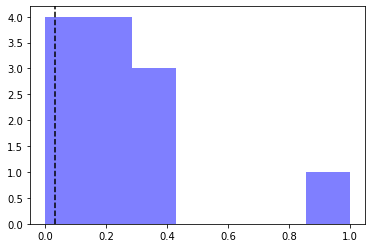

--------------------------------
CoLA - seed_1337
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


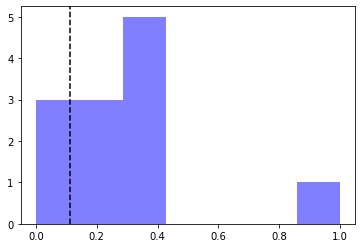

--------------------------------
CoLA - seed_86
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


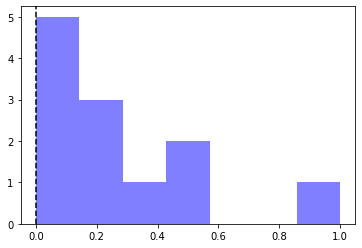

Pruning Iteration:  1
(12,) (12,)
Number of surviving mlps: 11
Amount pruned 1


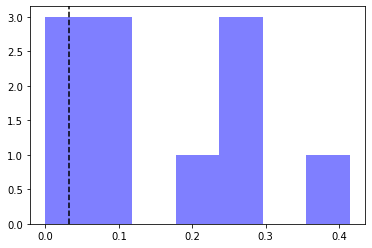

--------------------------------
CoLA - seed_42
CoLA - seed_166
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


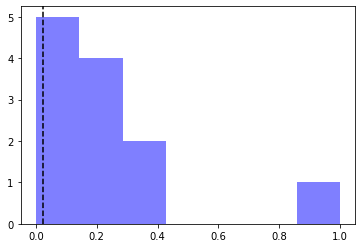

Pruning Iteration:  1
(12,) (12,)
Number of surviving mlps: 11
Amount pruned 1


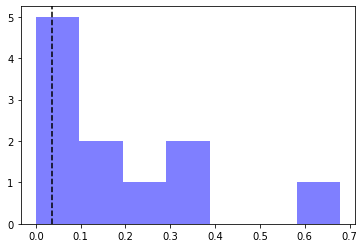

--------------------------------
MNLI - seed_71
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


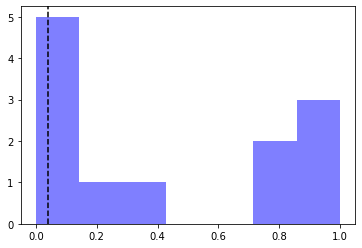

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


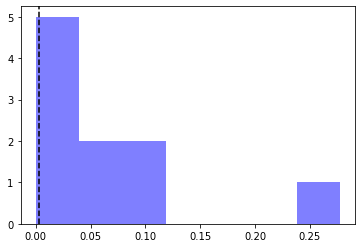

Pruning Iteration:  3
(12,) (12,)
Number of surviving mlps: 9
Amount pruned 1


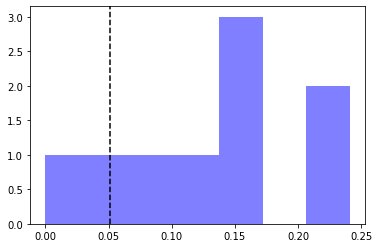

--------------------------------
MNLI - seed_1337
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


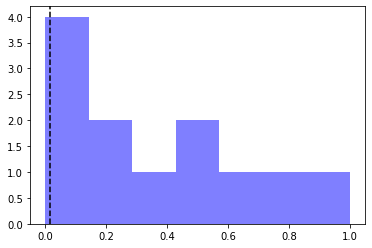

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


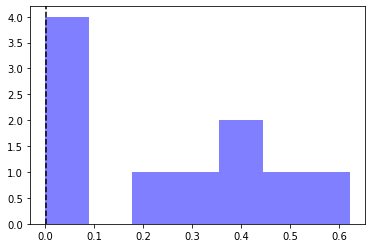

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


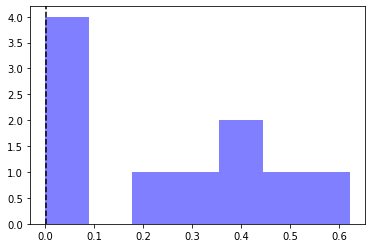

--------------------------------
MNLI - seed_86
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


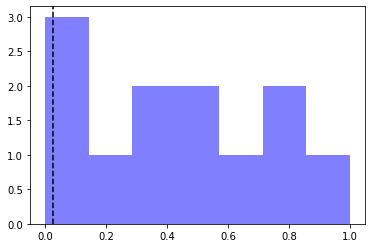

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


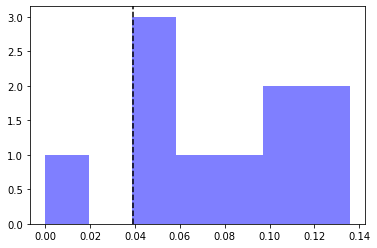

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


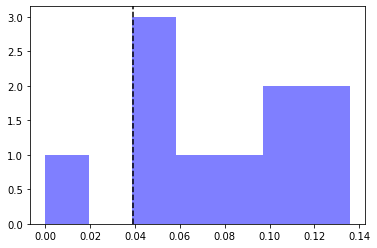

--------------------------------
MNLI - seed_42
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


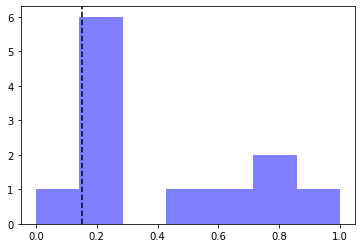

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


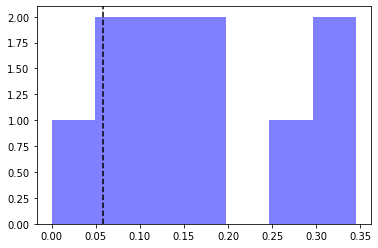

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


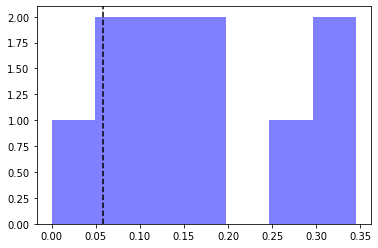

--------------------------------
MNLI - seed_166
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


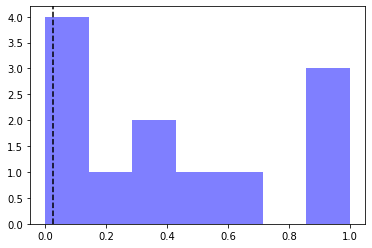

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


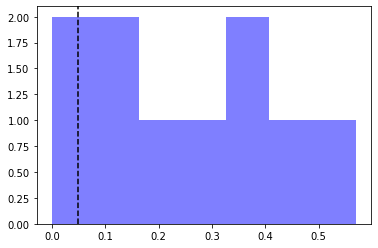

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


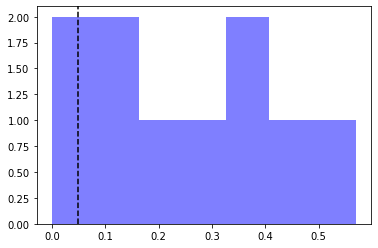

--------------------------------
MRPC - seed_71
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


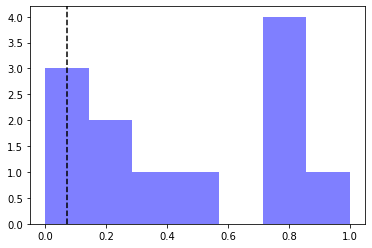

--------------------------------
MRPC - seed_1337
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


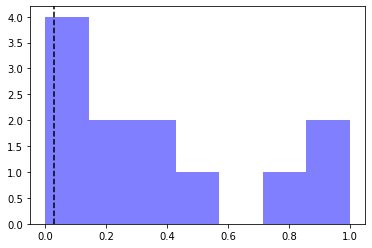

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


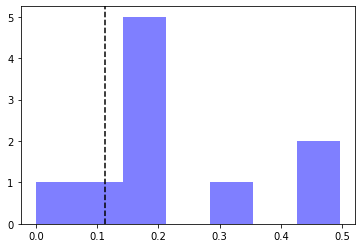

Pruning Iteration:  3
(12,) (12,)
Number of surviving mlps: 9
Amount pruned 1


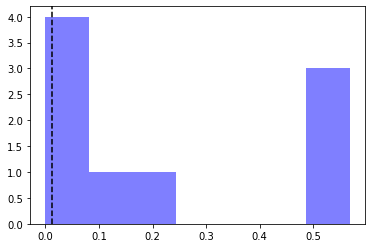

--------------------------------
MRPC - seed_86
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


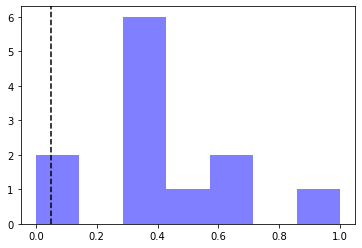

--------------------------------
MRPC - seed_42
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


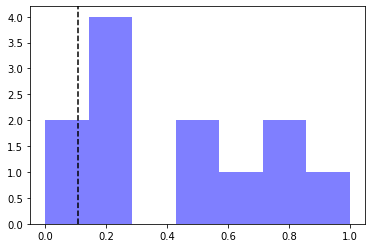

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


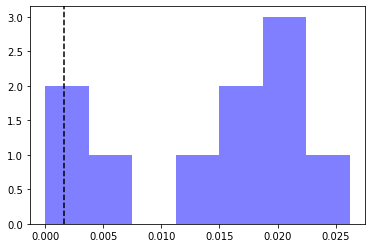

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


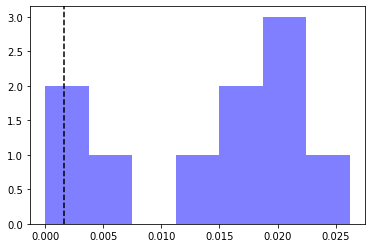

--------------------------------
MRPC - seed_166
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


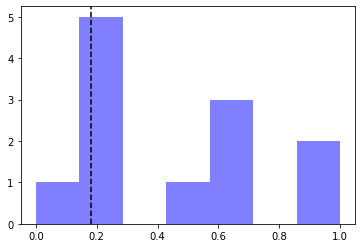

Pruning Iteration:  1
(12,) (12,)
Number of surviving mlps: 11
Amount pruned 1


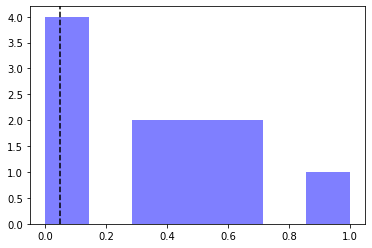

--------------------------------
QNLI - seed_71
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


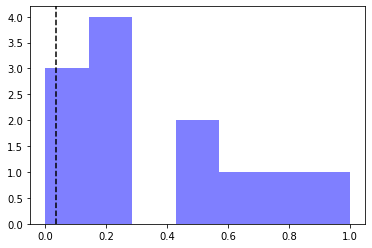

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


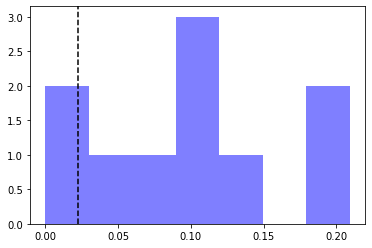

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


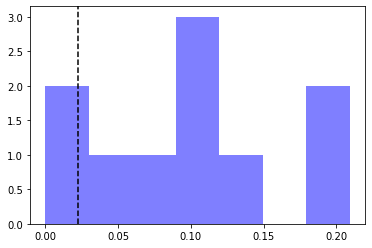

--------------------------------
QNLI - seed_1337
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


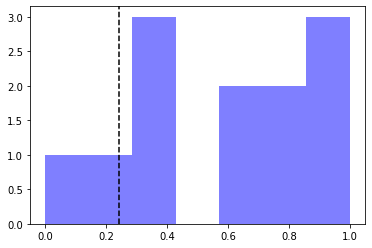

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


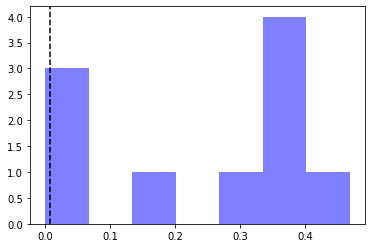

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


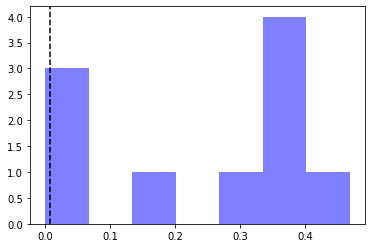

--------------------------------
QNLI - seed_86
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


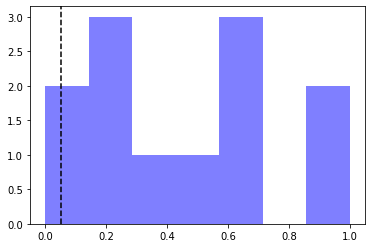

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


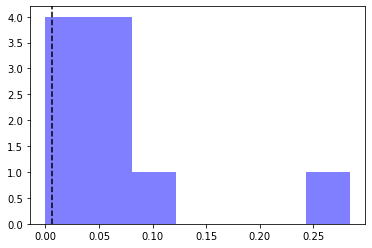

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


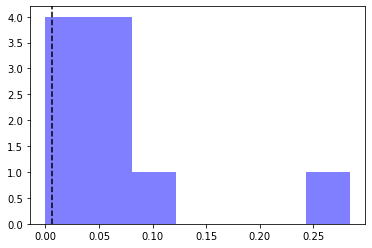

--------------------------------
QNLI - seed_42
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


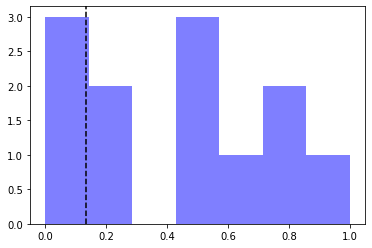

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


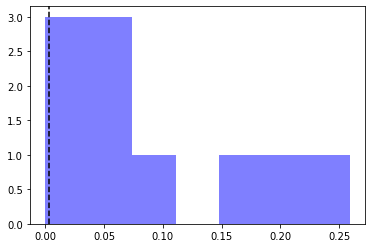

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


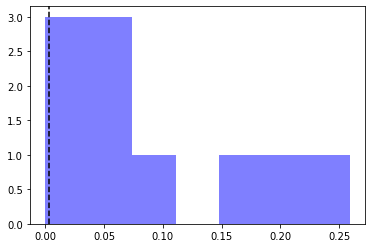

--------------------------------
QNLI - seed_166
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


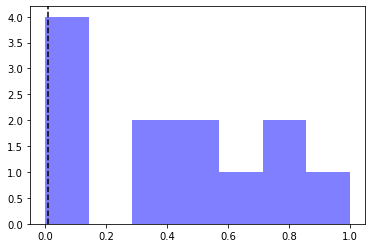

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


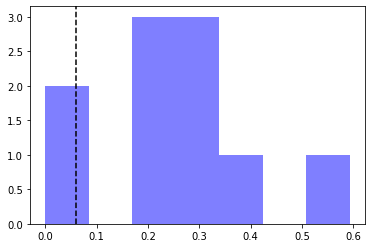

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


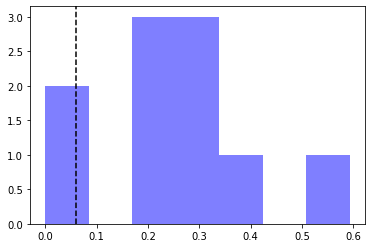

--------------------------------
QQP - seed_71
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


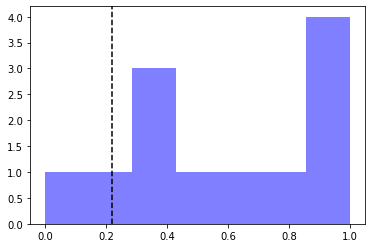

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


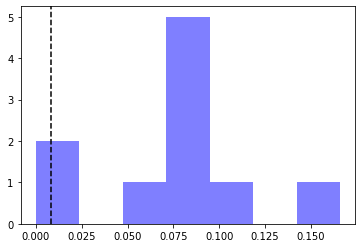

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


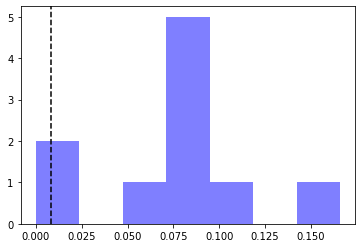

--------------------------------
QQP - seed_1337
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


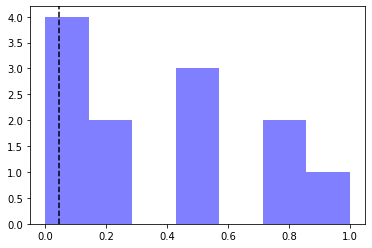

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


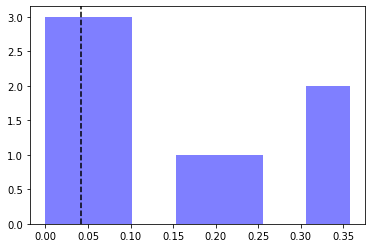

Pruning Iteration:  3
(12,) (12,)
Number of surviving mlps: 9
Amount pruned 1


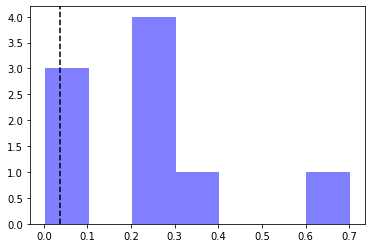

--------------------------------
QQP - seed_86
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


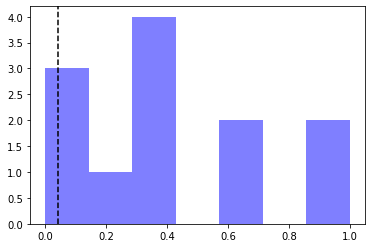

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


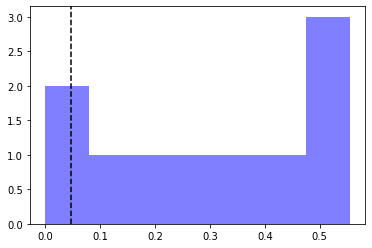

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


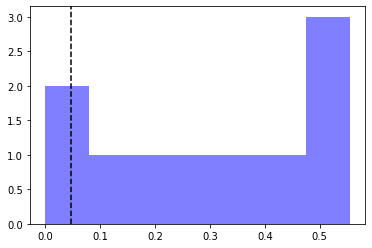

--------------------------------
QQP - seed_42
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


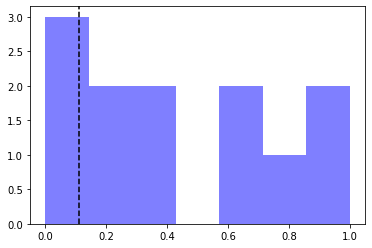

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


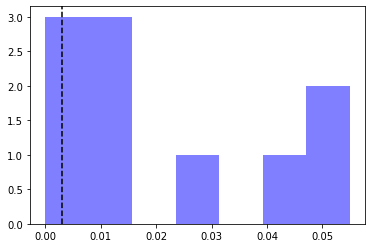

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


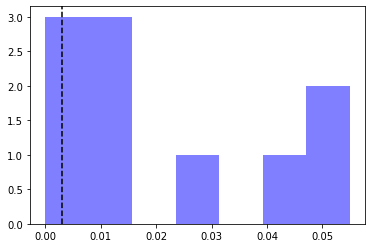

--------------------------------
QQP - seed_166
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


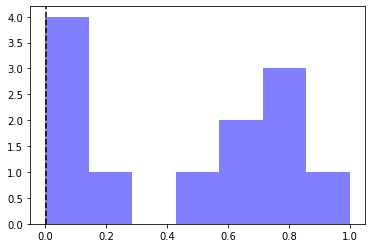

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


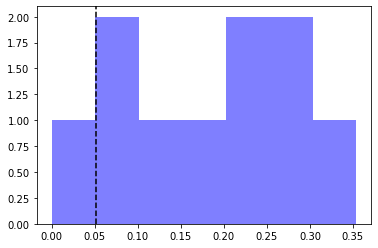

Pruning Iteration:  3
(12,) (12,)
Number of surviving mlps: 9
Amount pruned 1


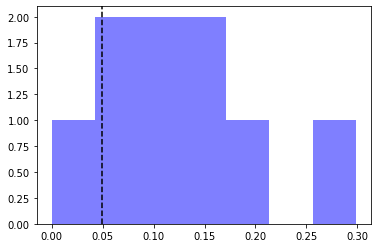

--------------------------------
RTE - seed_71
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


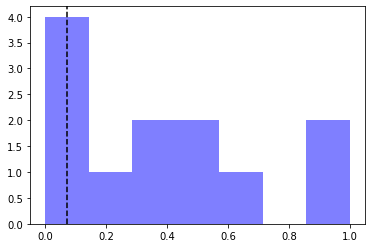

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


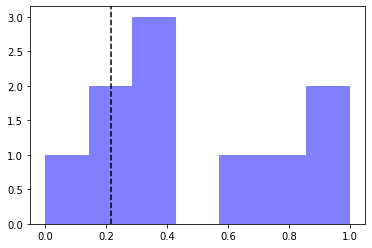

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


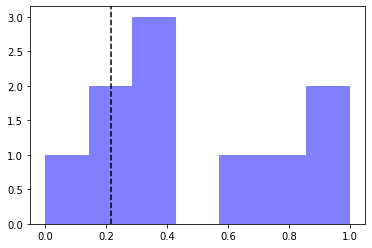

--------------------------------
RTE - seed_1337
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


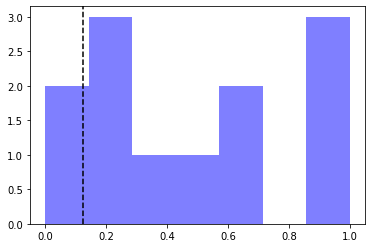

--------------------------------
RTE - seed_86
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


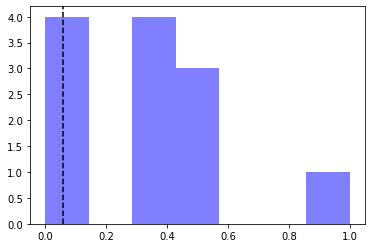

Pruning Iteration:  3
(12,) (12,)
Number of surviving mlps: 9
Amount pruned 1


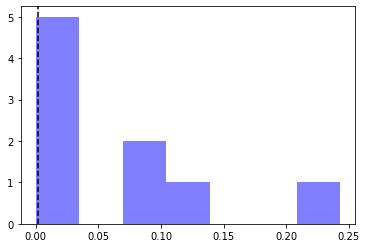

Pruning Iteration:  4
(12,) (12,)
Number of surviving mlps: 8
Amount pruned 1


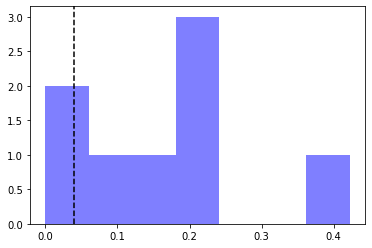

--------------------------------
RTE - seed_42
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


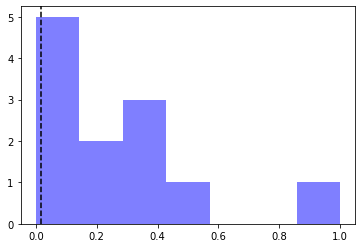

--------------------------------
RTE - seed_166
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


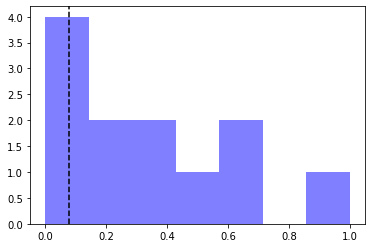

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


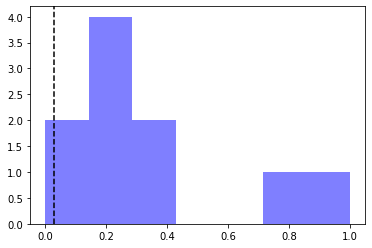

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


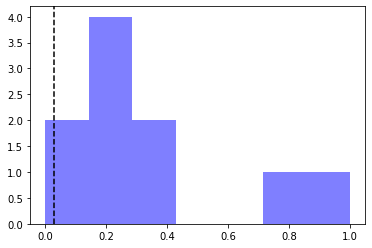

--------------------------------
SST-2 - seed_71
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


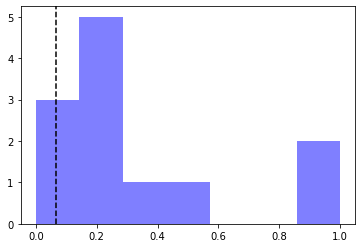

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


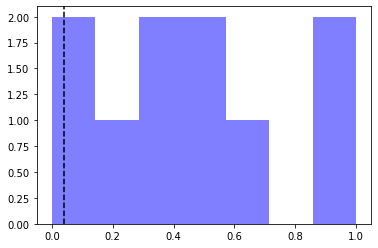

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


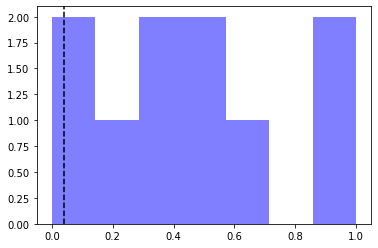

--------------------------------
SST-2 - seed_1337
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


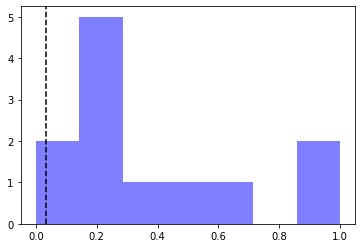

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


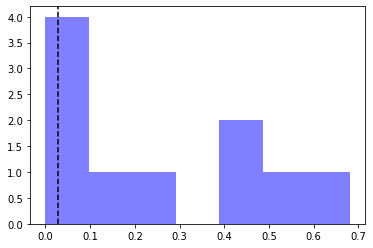

Pruning Iteration:  3
(12,) (12,)
Number of surviving mlps: 9
Amount pruned 1


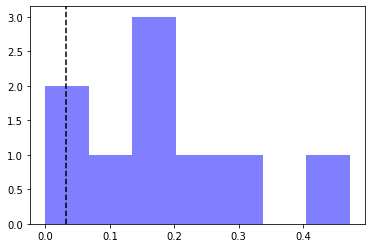

--------------------------------
SST-2 - seed_86
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


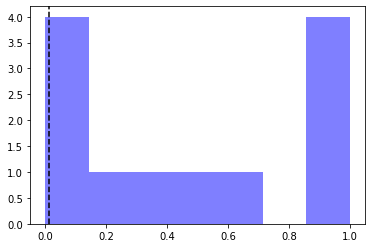

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


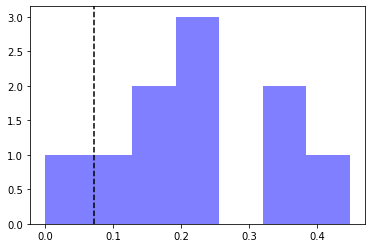

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


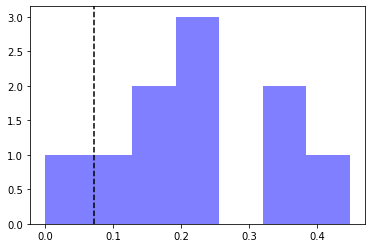

--------------------------------
SST-2 - seed_42
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


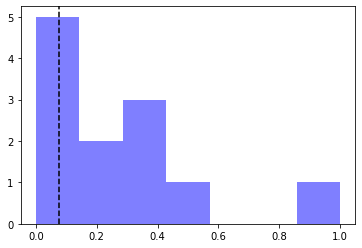

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


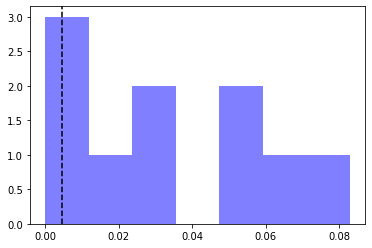

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


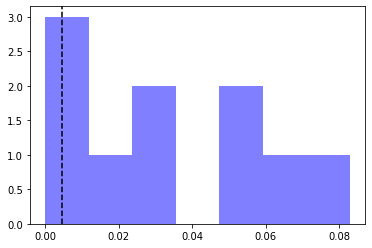

--------------------------------
SST-2 - seed_166
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


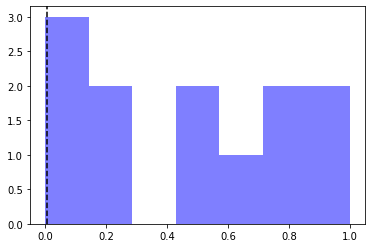

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


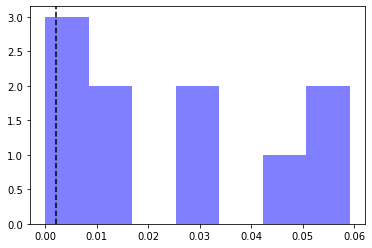

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


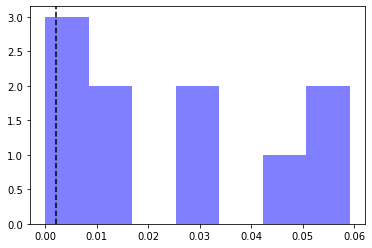

--------------------------------
STS-B - seed_71
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


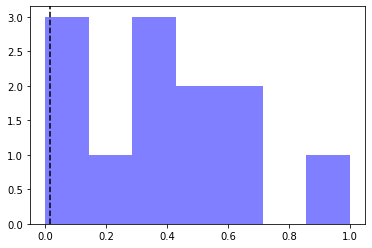

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


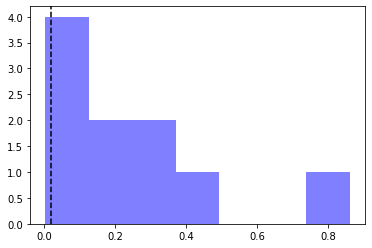

Pruning Iteration:  3
(12,) (12,)
Number of surviving mlps: 9
Amount pruned 1


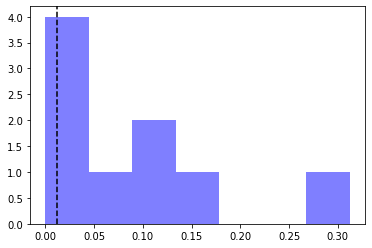

--------------------------------
STS-B - seed_1337
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


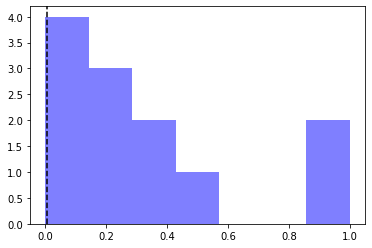

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


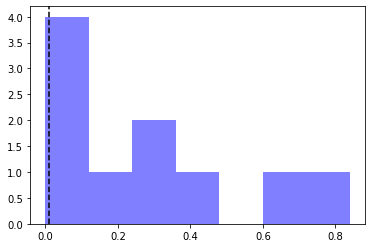

Pruning Iteration:  3
(12,) (12,)
Number of surviving mlps: 9
Amount pruned 1


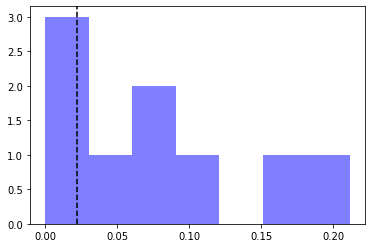

--------------------------------
STS-B - seed_86
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


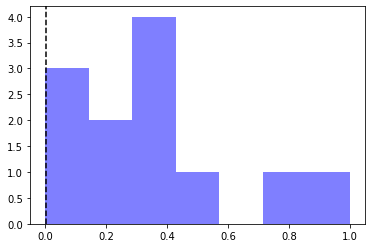

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


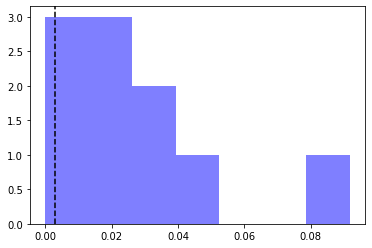

Pruning Iteration:  3
(12,) (12,)
Number of surviving mlps: 9
Amount pruned 1


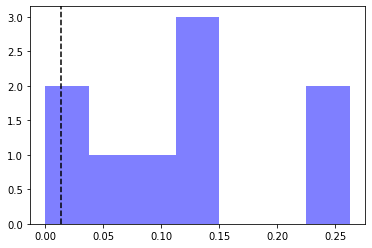

--------------------------------
STS-B - seed_42
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


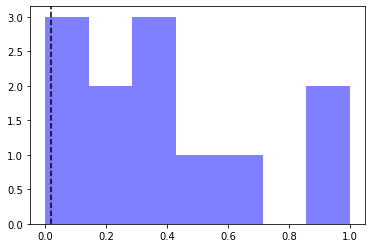

Pruning Iteration:  3
(12,) (12,)
Number of surviving mlps: 9
Amount pruned 1


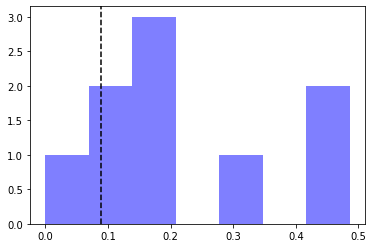

Pruning Iteration:  4
(12,) (12,)
Number of surviving mlps: 8
Amount pruned 1


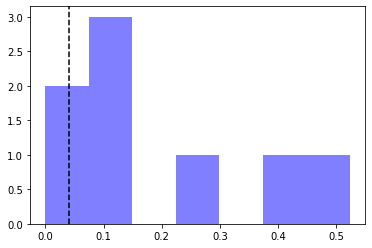

--------------------------------
STS-B - seed_166
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


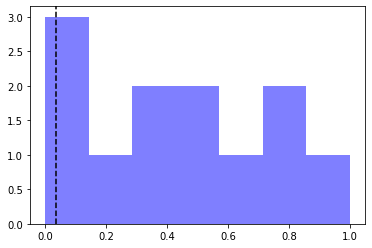

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


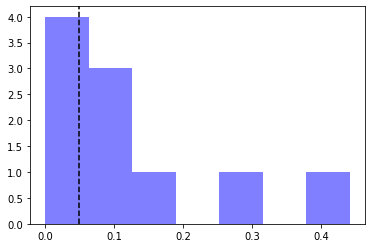

Pruning Iteration:  2
(12,) (12,)
Number of surviving mlps: 10
Amount pruned 1


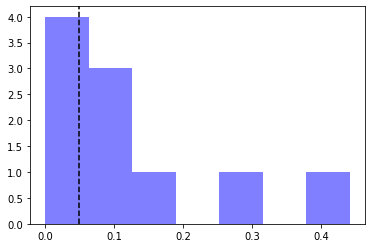

--------------------------------
WNLI - seed_71
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


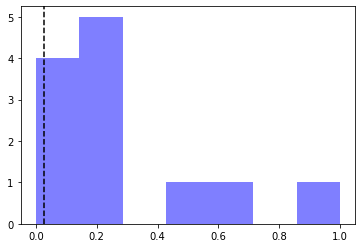

Pruning Iteration:  5
(12,) (12,)
Number of surviving mlps: 7
Amount pruned 1


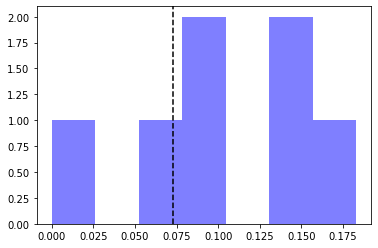

Pruning Iteration:  9
(12,) (12,)
Number of surviving mlps: 3
Amount pruned 1


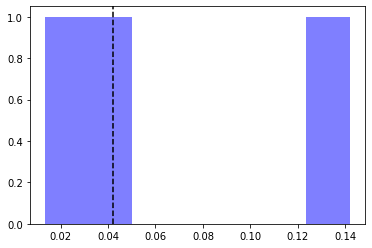

--------------------------------
WNLI - seed_1337
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


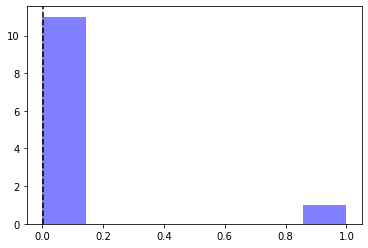

Pruning Iteration:  5
(12,) (12,)
Number of surviving mlps: 7
Amount pruned 1


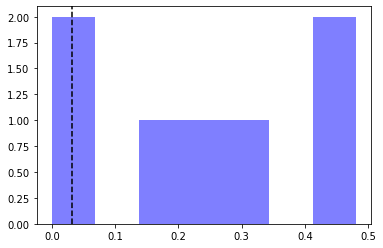

Pruning Iteration:  9
(12,) (12,)
Number of surviving mlps: 3
Amount pruned 1


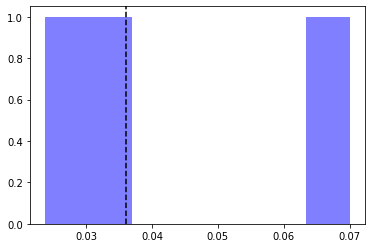

--------------------------------
WNLI - seed_86
WNLI - seed_42
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


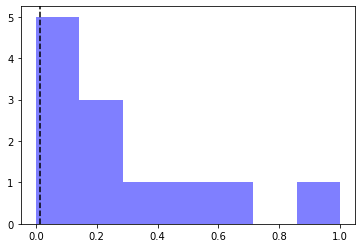

Pruning Iteration:  5
(12,) (12,)
Number of surviving mlps: 7
Amount pruned 1


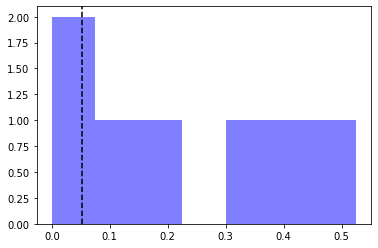

Pruning Iteration:  9
(12,) (12,)
Number of surviving mlps: 3
Amount pruned 1


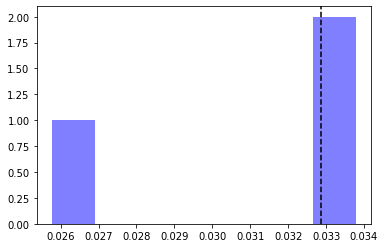

--------------------------------
WNLI - seed_166
Pruning Iteration:  0
(12,) (12,)
Number of surviving mlps: 12
Amount pruned 1


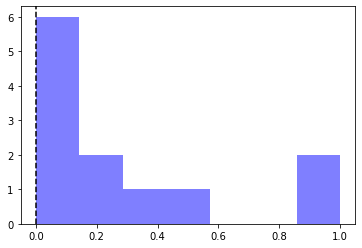

Pruning Iteration:  5
(12,) (12,)
Number of surviving mlps: 7
Amount pruned 1


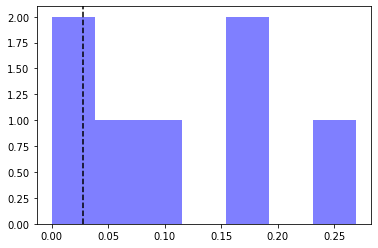

Pruning Iteration:  9
(12,) (12,)
Number of surviving mlps: 3
Amount pruned 1


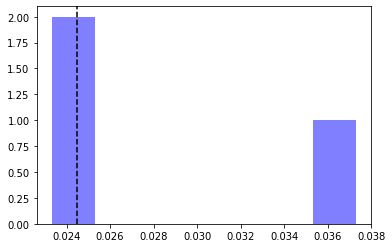

--------------------------------


In [154]:
plot_mlp_distribution(data_together)